### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sc
import sklearn as skl
plt.style.use('ggplot')

### Read Data

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Dropbox\My PC (DESKTOP-7FDR3DB)\Downloads\weatherHistory.csv")
datac = data.copy()
data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                     251          15.8263               1015.13   
1                     259          15.8263               1015.63   
2                     204          14.9569               1015.94   
3                     269          15.8263               1016.41   
4                     259          15.8263               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [3]:
columns = data.columns.to_list()

### checking dtypes of columns  

In [4]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [5]:
obj_columns = data.iloc[:, list(data.dtypes == 'object')].columns.to_list()
num_columns = data.iloc[:, list(data.dtypes != 'object')].columns.to_list()
obj_columns.remove('Formatted Date')

### Unique Values

In [6]:
data[obj_columns].nunique().to_dict()

{'Summary': 27, 'Precip Type': 2, 'Daily Summary': 214}

### Checking for Missing values

In [7]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

there is 517 missing values in precip type which is very small compared to over data set so will drop them.

In [8]:
print('before shape :', data.shape)
data.dropna(inplace=True) 
datac = data.copy()
print('after shape :', data.shape)


before shape : (96453, 11)
after shape : (95936, 11)


### Manupalation in date data

In [9]:
data['date'] = data['Formatted Date'].apply(lambda x: np.datetime64(x.split('.000')[0])).dt.date
data['hour'] = data['Formatted Date'].apply(lambda x: np.datetime64(x.split('.000')[0])).dt.hour
data['month'] = data['Formatted Date'].apply(lambda x: np.datetime64(x.split('.000')[0])).dt.month
data['year'] = data['Formatted Date'].apply(lambda x: np.datetime64(x.split('.000')[0])).dt.year
data.drop(['Formatted Date'], axis=1, inplace=True)

In [10]:
data = data[['year', 'month', 'hour', 'date']+num_columns+obj_columns]
data = data.sort_values(by=['year', 'month', 'date'])
datac = data.copy()
data.head()

year  month  hour        date  Temperature (C)  \
2880  2006      1     0  2006-01-01         0.577778   
2881  2006      1     1  2006-01-01         1.161111   
2882  2006      1     2  2006-01-01         1.666667   
2883  2006      1     3  2006-01-01         1.711111   
2884  2006      1     4  2006-01-01         1.183333   

      Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
2880                 -4.050000      0.89            17.1143   
2881                 -3.238889      0.85            16.6152   
2882                 -3.155556      0.82            20.2538   
2883                 -2.194444      0.82            14.4900   
2884                 -2.744444      0.86            13.9426   

      Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
2880                     140           9.9820               1016.66   
2881                     139           9.9015               1016.15   
2882                     140           9.9015               1015.87   
2883                     140           9.9015               1015.56   
2884                     134           9.9015               1014.98   

            Summary Precip Type                      Daily Summary  
2880  Partly Cloudy        rain  Mostly cloudy throughout the day.  
2881  Mostly Cloudy        rain  Mostly cloudy throughout the day.  
2882  Mostly Cloudy        rain  Mostly cloudy throughout the day.  
2883       Overcast        rain  Mostly cloudy throughout the day.  
2884  Mostly Cloudy        rain  Mostly cloudy throughout the day.

In [11]:
years = list(data['year'].unique())
for y in years: 
  print(y, ' :')
  for m in range(1,13):
    n = data[(data['year'] == y) & (data['month'] == m)].shape[0]
    print(f'   {m} : {n} records.')

2006  :
   1 : 744 records.
   2 : 672 records.
   3 : 743 records.
   4 : 720 records.
   5 : 744 records.
   6 : 720 records.
   7 : 744 records.
   8 : 744 records.
   9 : 720 records.
   10 : 745 records.
   11 : 720 records.
   12 : 744 records.
2007  :
   1 : 744 records.
   2 : 672 records.
   3 : 743 records.
   4 : 720 records.
   5 : 744 records.
   6 : 720 records.
   7 : 744 records.
   8 : 744 records.
   9 : 720 records.
   10 : 745 records.
   11 : 720 records.
   12 : 744 records.
2008  :
   1 : 744 records.
   2 : 696 records.
   3 : 743 records.
   4 : 720 records.
   5 : 744 records.
   6 : 720 records.
   7 : 744 records.
   8 : 744 records.
   9 : 720 records.
   10 : 745 records.
   11 : 720 records.
   12 : 744 records.
2009  :
   1 : 744 records.
   2 : 672 records.
   3 : 743 records.
   4 : 720 records.
   5 : 744 records.
   6 : 720 records.
   7 : 744 records.
   8 : 744 records.
   9 : 720 records.
   10 : 745 records.
   11 : 720 records.
   12 : 744 recor

### Scale data

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = []

scaler = MinMaxScaler()
data[num_columns] = scaler.fit_transform(data[num_columns].values)



### Distribution of Numeric columns over year

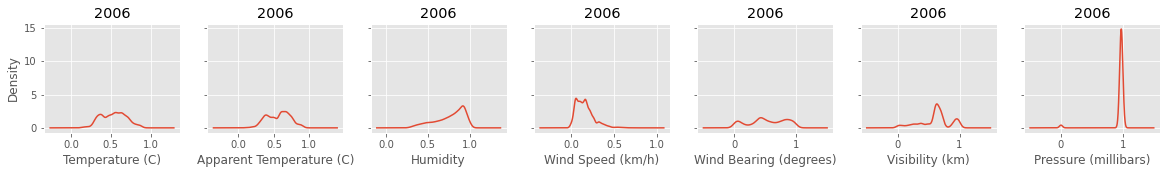

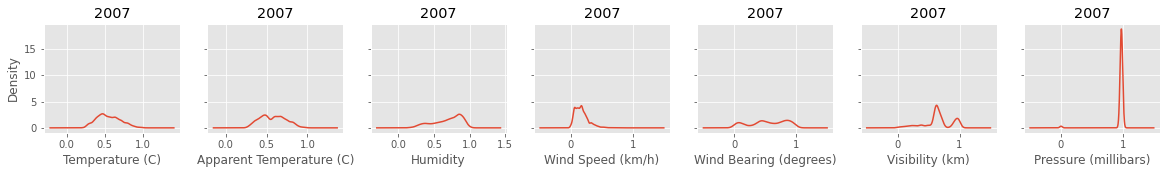

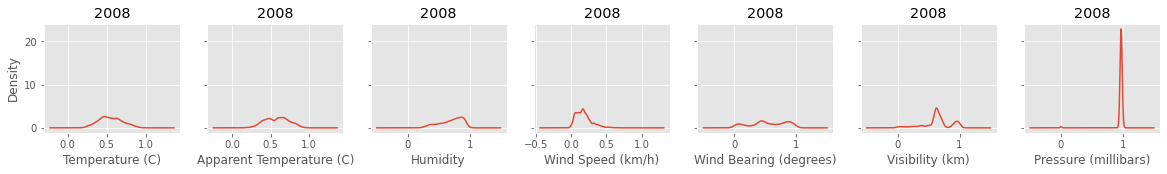

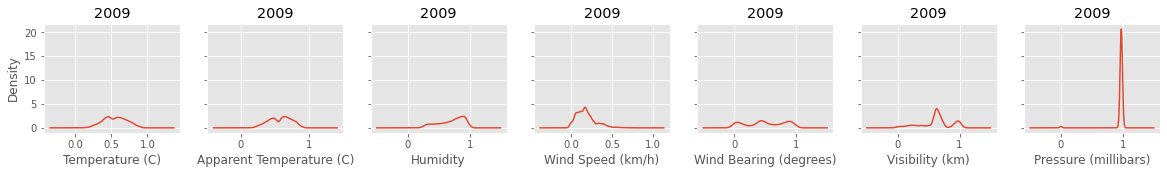

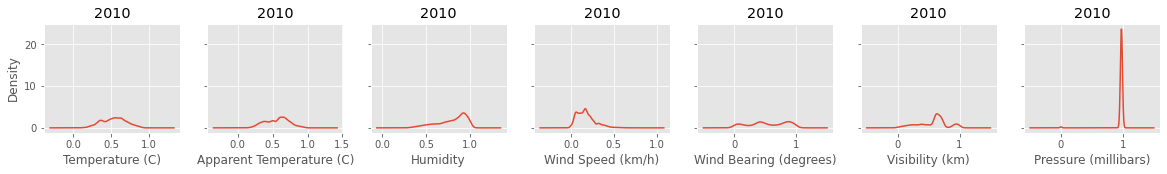

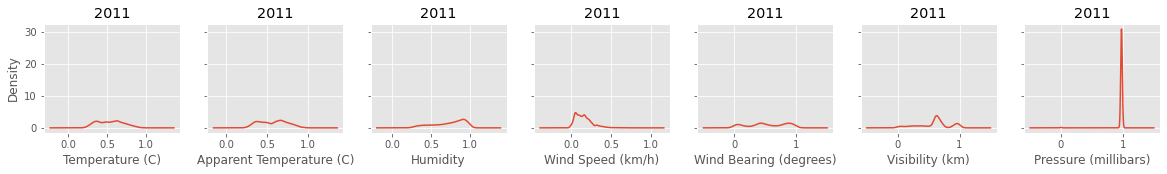

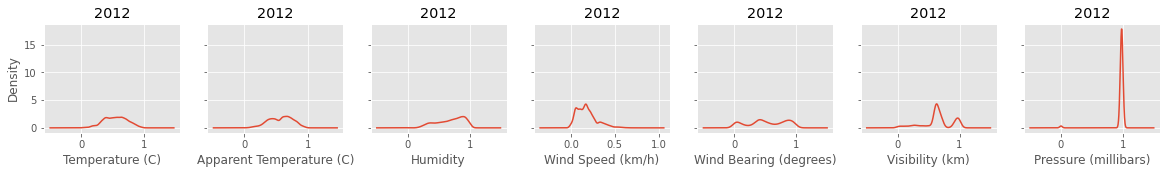

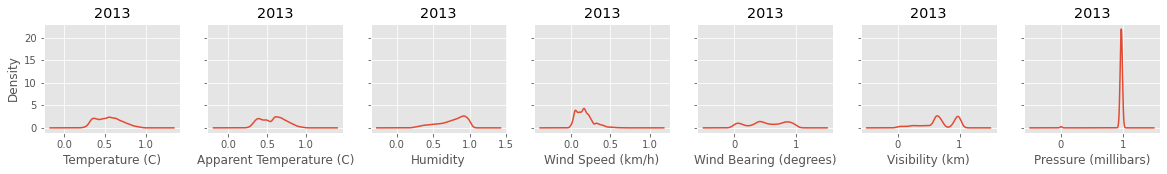

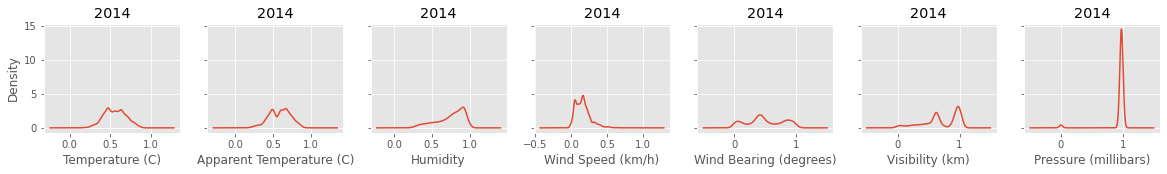

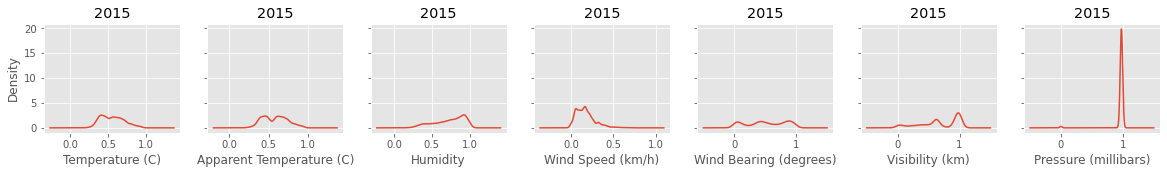

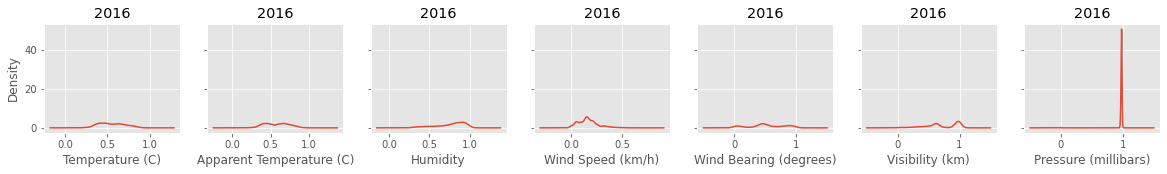

In [39]:
#f, axs = make_subplots(len(years), len(num_columns)))
n = len(num_columns)
for i,y in enumerate(years):
    f, axs = plt.subplots(1, n, sharey=True, figsize = (20, 2))
    for i, col in enumerate(num_columns):
        data[data['year']==y][col].plot(kind = 'kde', ax=axs[i], title=str(y))
        axs[i].set_xlabel(col)
    plt.show()

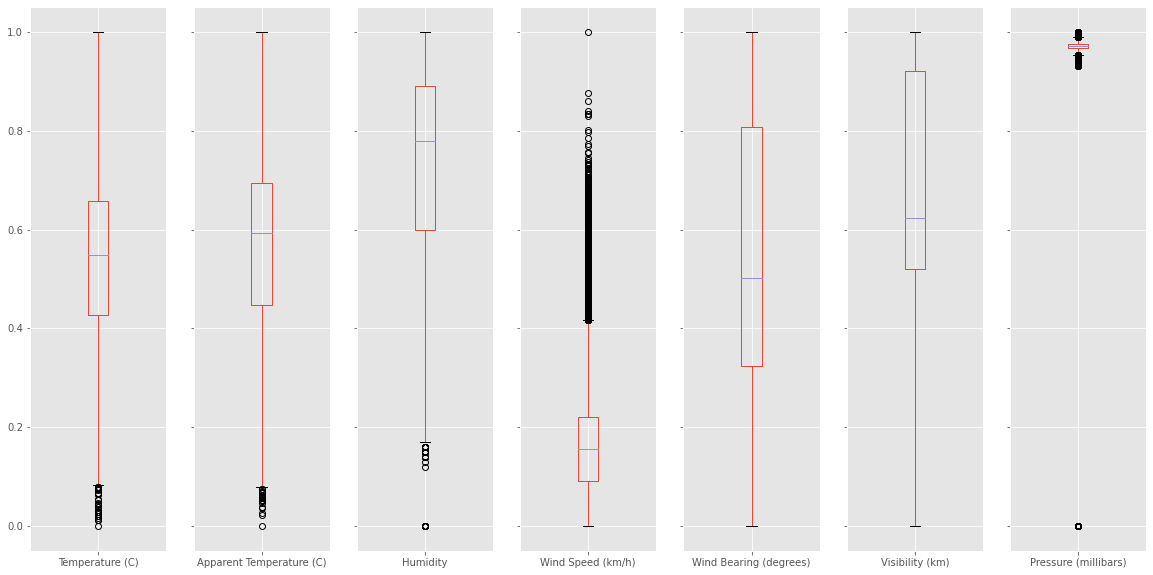

In [31]:
#f, axs = make_subplots(len(years), len(num_columns)))
f, axs = plt.subplots(1, 7, sharey = True, figsize = (20,10))
for i,c in enumerate(num_columns):
    f = data[[c, 'year']].plot(kind = 'box', x='year', y= c, ax = axs[i])#, title=str(y))
plt.show()

### statisticle change over year

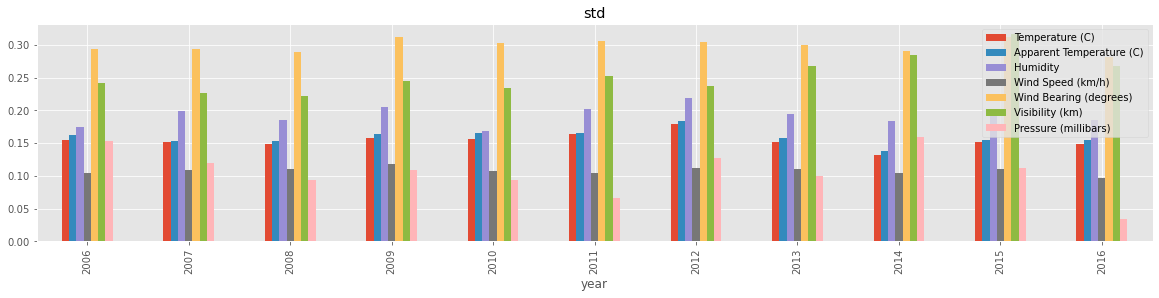

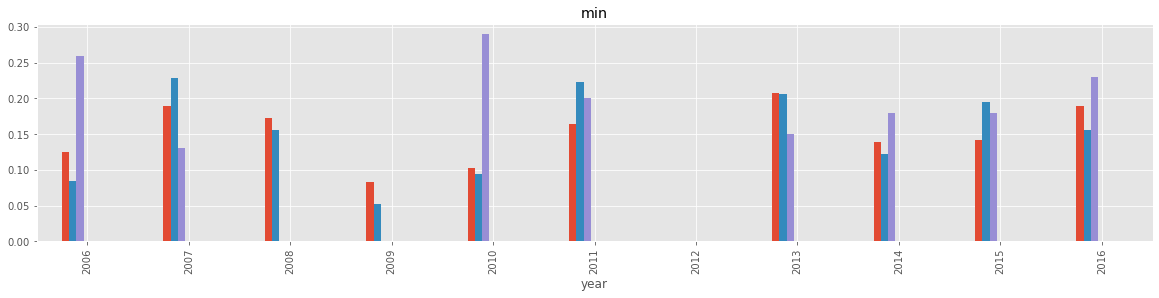

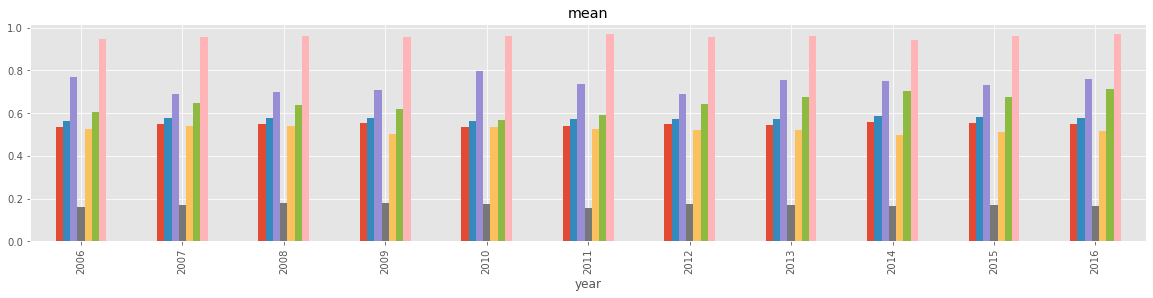

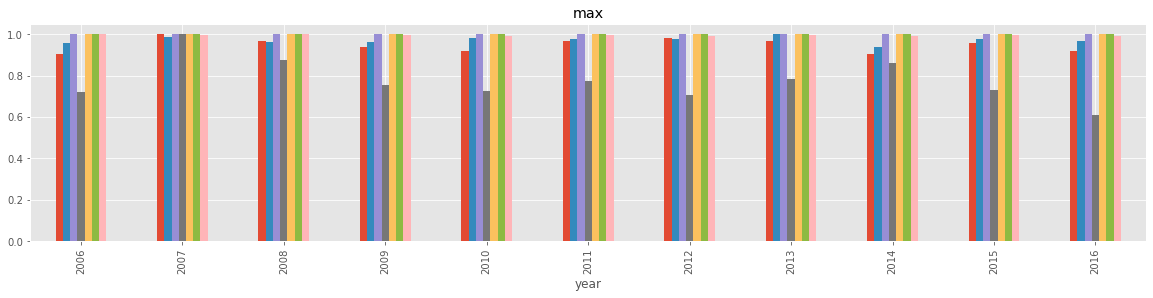

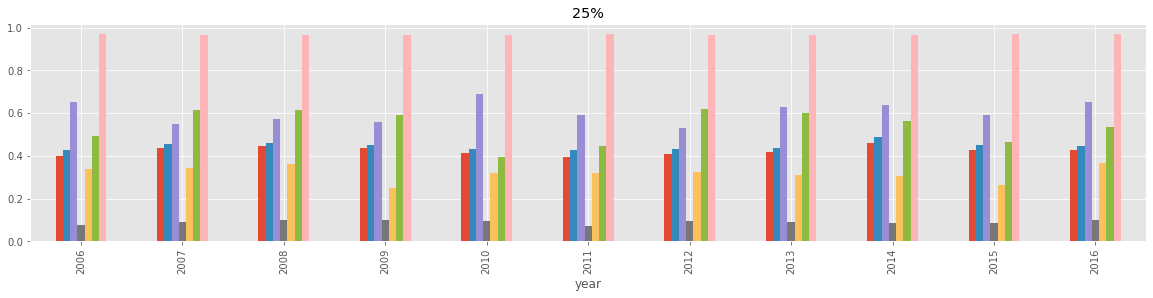

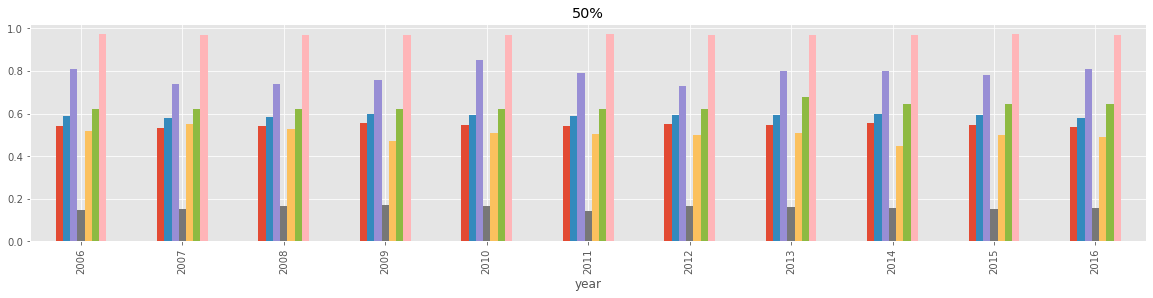

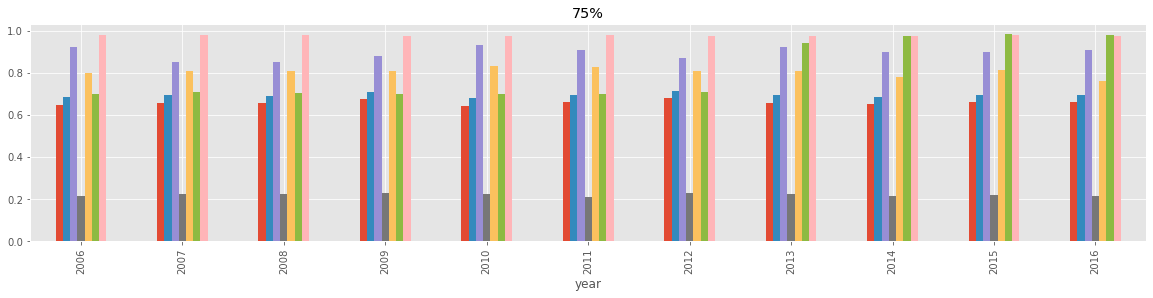

In [47]:
dd=[]
for y in years: 
  d = data[data['year']==y][num_columns].describe()
  d = d.drop(['count'], axis=0)
  d['year'] = y
  dd.append(d)

d = pd.concat(dd, axis=0)
d = d.reset_index()
d = d.groupby(['index','year']).sum()

for i,p in enumerate(['std', 'min', 'mean', 'max']):
  f = d.loc[p].plot(kind='bar', title=p, figsize=(20,4))
  if p != 'std':
    plt.legend().set_visible(False)
    plt.show();
    
  else:
    plt.show()
)
for i,p in enumerate(['25%', '50%', '75%']):
  f = d.loc[p].plot(kind='bar', title=p, figsize=(20,4))
  plt.legend().set_visible(False)
  plt.show()




### convering hourly data into daily data

In [48]:
d = data.copy()
num_d = d.groupby(['date'])[num_columns].mean()
obj_d = d.groupby(['date'])[obj_columns].agg(lambda x: x.value_counts().index[0])

In [49]:
daily_d = pd.concat([num_d, obj_d], axis=1)

### Analysis of Summary of weather

In [50]:
data['Daily Summary'].unique()

array(['Mostly cloudy throughout the day.',
       'Overcast throughout the day.', 'Foggy in the morning.',
       'Foggy until morning.',
       'Foggy starting overnight continuing until morning.',
       'Partly cloudy in the afternoon.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy until afternoon.',
       'Foggy starting overnight continuing until night.',
       'Mostly cloudy starting overnight continuing until evening.',
       'Mostly cloudy starting overnight.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until night.',
       'Mostly cloudy throughout the day and breezy in the evening.',
       'Partly cloudy starting in the morning continuing until afternoon.',
       'Mostly cloudy starting in the morning.',
       'Partly cloudy throughout the day.',
       'Foggy starting in the morning continuing until afternoon.',
       'Foggy starting overnight continuing until afternoon.',
       'Foggy overnigh

1. is there any massive change in continuous data over day over year.

In [65]:
d = data.copy()
std_num_day = d.groupby(['date'])[num_columns].std()
std_num_day.index = pd.to_datetime(std_num_day.index, errors='coerce')
std_num_day['year'] = pd. DatetimeIndex(std_num_day.index).year
std_num_day = std_num_day.groupby(['year'])[num_columns].std()


In [67]:
#std_num_day1  = std_num_day.groupby(pd.Grouper(freq='1M'))
std_num_day

Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
year                                                                           
2006         0.025576                  0.022823  0.062410           0.029317   
2007         0.029202                  0.024267  0.057803           0.033156   
2008         0.025688                  0.021738  0.056409           0.029712   
2009         0.028242                  0.023615  0.064047           0.030641   
2010         0.024345                  0.023456  0.061491           0.029039   
2011         0.029455                  0.024776  0.066650           0.029826   
2012         0.029679                  0.024738  0.060416           0.031041   
2013         0.029200                  0.024690  0.064594           0.029925   
2014         0.026077                  0.023690  0.062106           0.028791   
2015         0.029780                  0.026672  0.064075           0.031016   
2016         0.026518                  0.024285  0.064783           0.030581   

      Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
year                                                                 
2006                0.125104         0.050083              0.127227  
2007                0.116551         0.044715              0.089445  
2008                0.123624         0.041879              0.075748  
2009                0.124700         0.044581              0.094599  
2010                0.126342         0.050141              0.078491  
2011                0.129585         0.047500              0.057182  
2012                0.130543         0.046057              0.097858  
2013                0.123533         0.069844              0.088062  
2014                0.128856         0.077902              0.099928  
2015                0.128618         0.083728              0.073781  
2016                0.136807         0.074903              0.030318

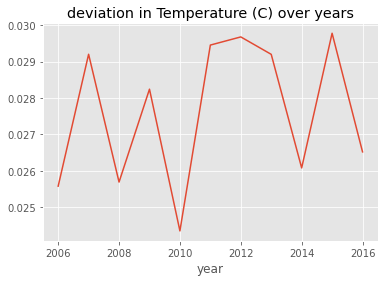

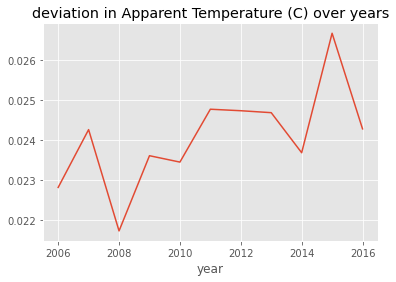

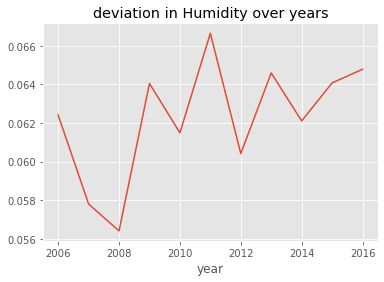

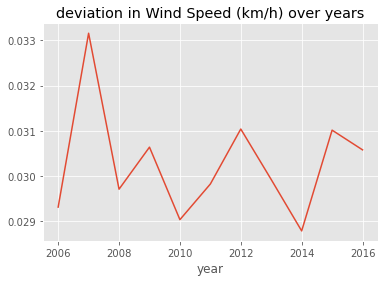

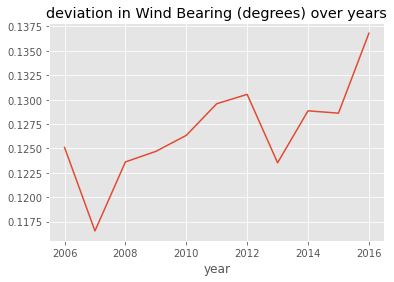

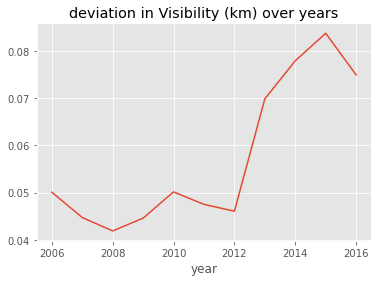

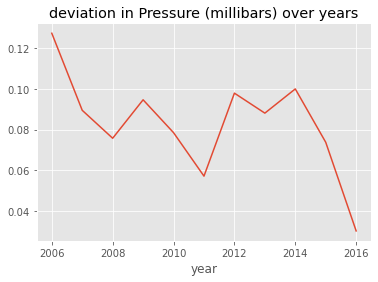

In [70]:
for c in num_columns:
    f = std_num_day[c].plot(kind='line', y = c, title= f'deviation in {c} over years')
    plt.show()
    

2. is there any massive change in continuous data over month over year.

In [71]:
d = data.copy()
d = d.groupby(['month','year'])[num_columns].describe()
d.head()

Temperature (C)                                                    \
                     count      mean       std       min       25%       50%   
month year                                                                     
1     2006           744.0  0.326400  0.074116  0.125281  0.292053  0.337773   
      2007           744.0  0.432452  0.066081  0.256683  0.386441  0.435334   
      2008           744.0  0.366834  0.072424  0.173252  0.317163  0.371569   
      2009           744.0  0.334509  0.086202  0.110521  0.271645  0.344523   
      2010           744.0  0.332165  0.074601  0.129511  0.290298  0.335883   

                               Apparent Temperature (C)            ...  \
                 75%       max                    count      mean  ...   
month year                                                         ...   
1     2006  0.380524  0.475115                    744.0  0.351110  ...   
      2007  0.479525  0.608496                    744.0  0.448885  ...   
      2008  0.416839  0.560526                    744.0  0.382352  ...   
      2009  0.407524  0.557736                    744.0  0.358469  ...   
      2010  0.362816  0.546215                    744.0  0.349060  ...   

           Visibility (km)        Pressure (millibars)                      \
                       75%    max                count      mean       std   
month year                                                                   
1     2006         0.62000  0.986                744.0  0.975930  0.080752   
      2007         0.70000  0.986                744.0  0.962946  0.106844   
      2008         0.62300  0.986                744.0  0.975930  0.062408   
      2009         0.62000  1.000                744.0  0.970795  0.051816   
      2010         0.48625  0.983                744.0  0.970032  0.037451   

                                                         
            min       25%       50%       75%       max  
month year                                               
1     2006  0.0  0.977652  0.984442  0.987994  0.998815  
      2007  0.0  0.972149  0.975960  0.978908  0.988398  
      2008  0.0  0.976426  0.979276  0.983775  0.992727  
      2009  0.0  0.963034  0.974818  0.981097  0.995852  
      2010  0.0  0.962029  0.971980  0.979783  0.991848  

[5 rows x 56 columns]

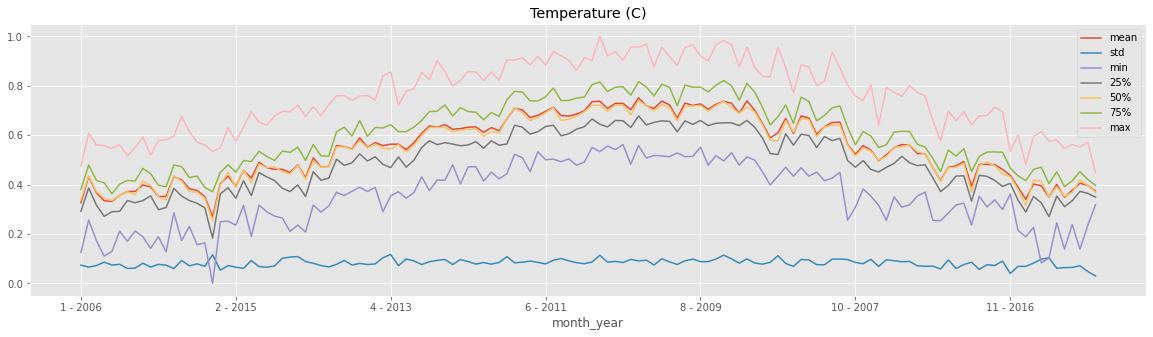

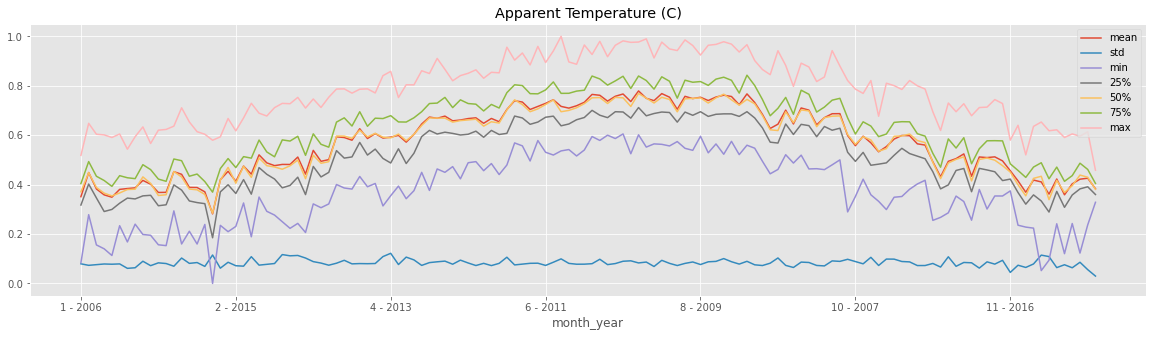

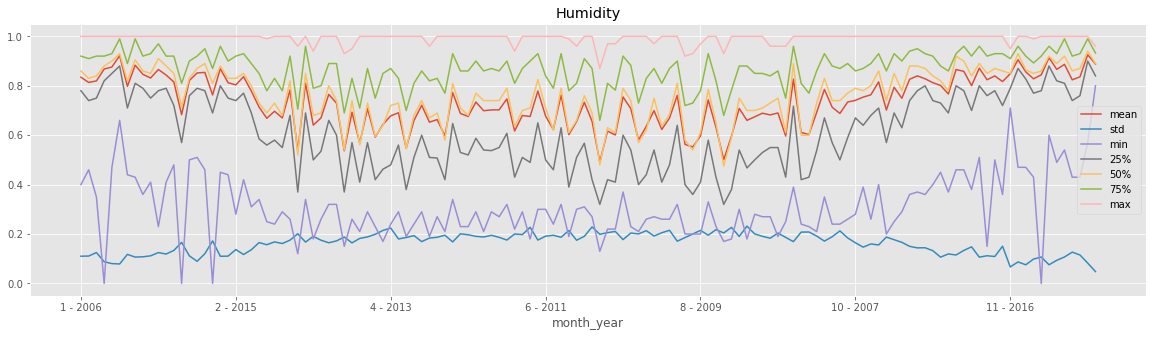

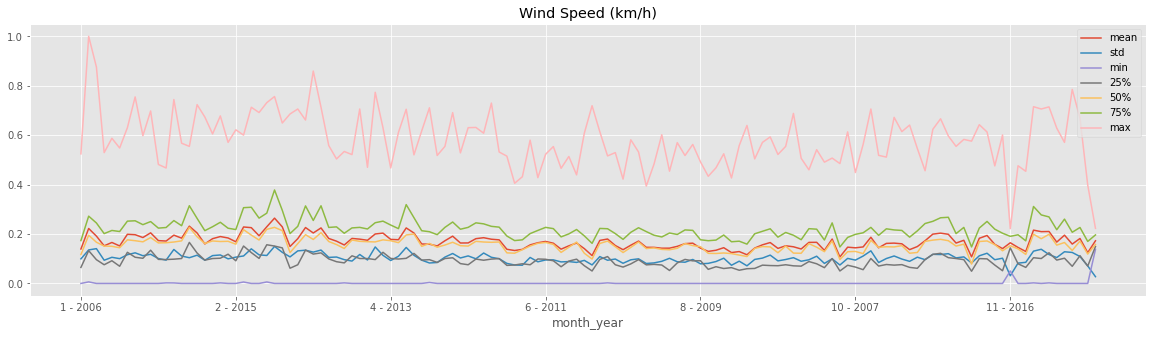

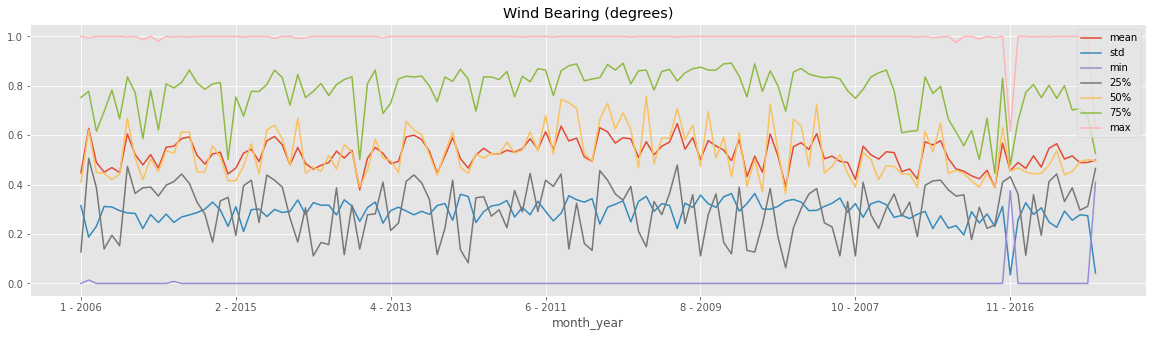

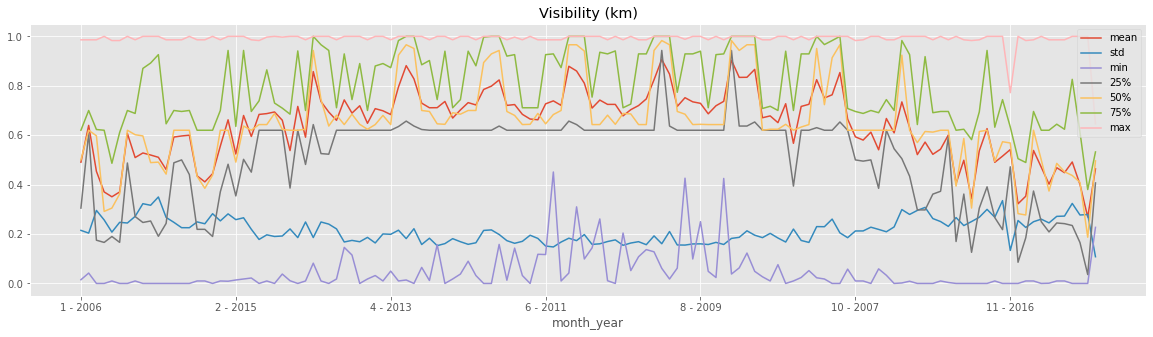

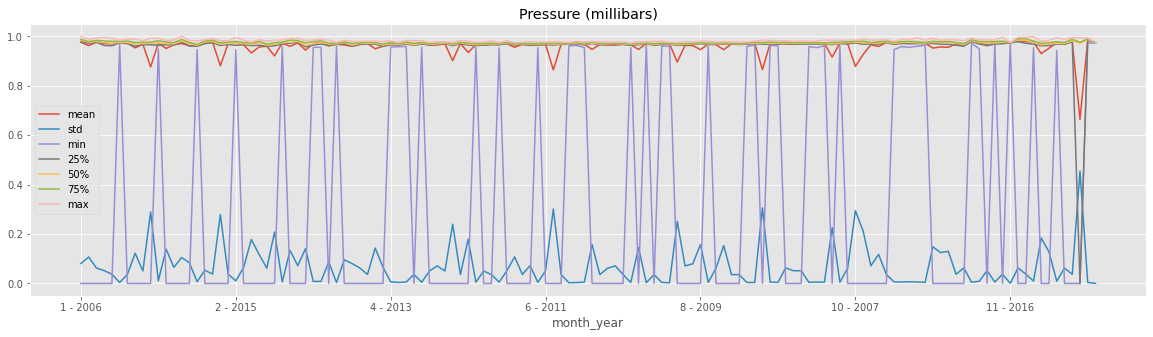

In [77]:
for n in num_columns:
  dd = d[n]

  dd = dd.reset_index()
  dd['month'] = dd['month'].astype('str')
  dd['year'] = dd['year'].astype('str')
  dd['month_year'] = dd['month']+' - '+dd['year']

  dd.plot(x = 'month_year', y=['mean',	'std',	'min',	'25%',	'50%',	'75%',	'max'], figsize=(20,5))
  plt.title(n)
  plt.show()

3. categorical features analysis

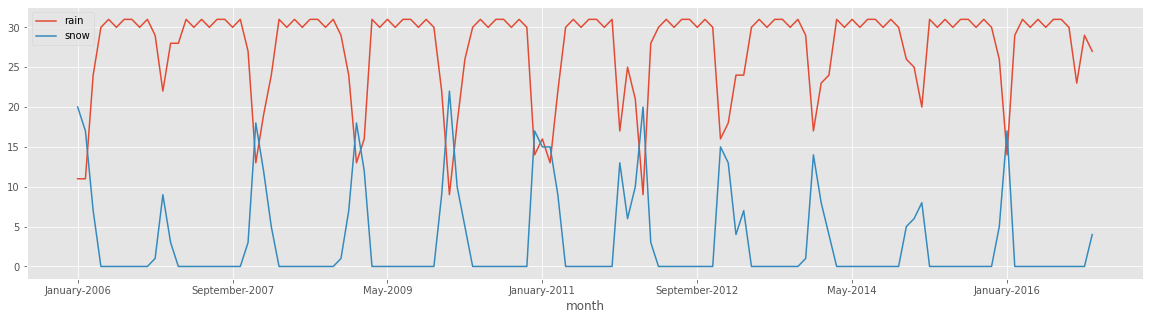

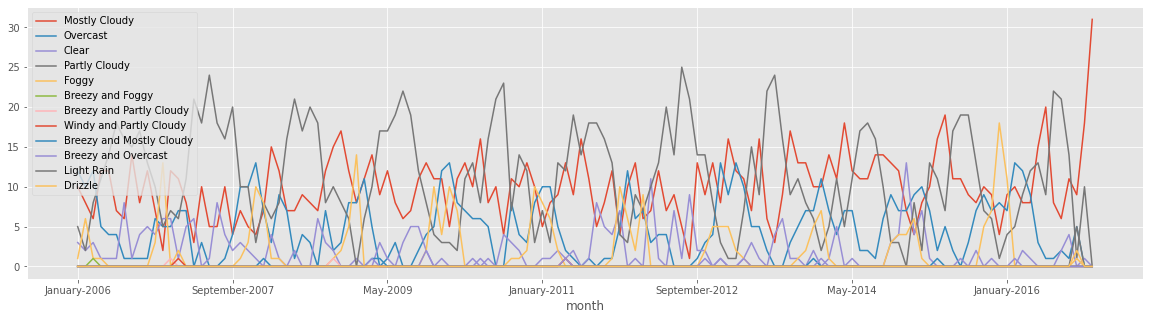

In [80]:
obj_d.index = pd.to_datetime(obj_d.index)
Precip_Type_df = pd.DataFrame(obj_d['Precip Type'])
Summary_df = pd.DataFrame(obj_d['Summary'])
Daily_Summary_df = pd.DataFrame(obj_d['Daily Summary'])

obj_d_Precip_Type_month = pd.get_dummies(Precip_Type_df, prefix=[''], prefix_sep='').groupby(pd.Grouper(freq='1M')).sum()
obj_d_Summary_month = pd.get_dummies(Summary_df, prefix=[''], prefix_sep='').groupby(pd.Grouper(freq='1M')).sum()
obj_d_Daily_Summary_month = pd.get_dummies(Daily_Summary_df, prefix=[''], prefix_sep='').groupby(pd.Grouper(freq='1M')).sum()

obj_d_Precip_Type_month['month'] = pd.to_datetime(obj_d_Precip_Type_month.index)
obj_d_Precip_Type_month['month'] = obj_d_Precip_Type_month['month'].apply(lambda x: x.strftime('%B-%Y'))

obj_d_Summary_month['month'] = pd.to_datetime(obj_d_Precip_Type_month.index)
obj_d_Summary_month['month'] = obj_d_Summary_month['month'].apply(lambda x: x.strftime('%B-%Y'))


obj_d_Daily_Summary_month['month'] = pd.to_datetime(obj_d_Precip_Type_month.index)
obj_d_Daily_Summary_month['month'] = obj_d_Daily_Summary_month['month'].apply(lambda x: x.strftime('%B-%Y'))




obj_d_Precip_Type_month = obj_d_Precip_Type_month.plot.line(x='month', y=list(Precip_Type_df['Precip Type'].unique()), figsize=(20,5))
obj_d_Summary_month = obj_d_Summary_month.plot.line(x='month', y=list(Summary_df['Summary'].unique()), figsize=(20,5))
#obj_d_Daily_Summary_month = obj_d_Daily_Summary_month.plot.line(x='month', y=list(Daily_Summary_df['Daily Summary'].unique()), figsize=(20,5))


### Year Year categorical Analysis

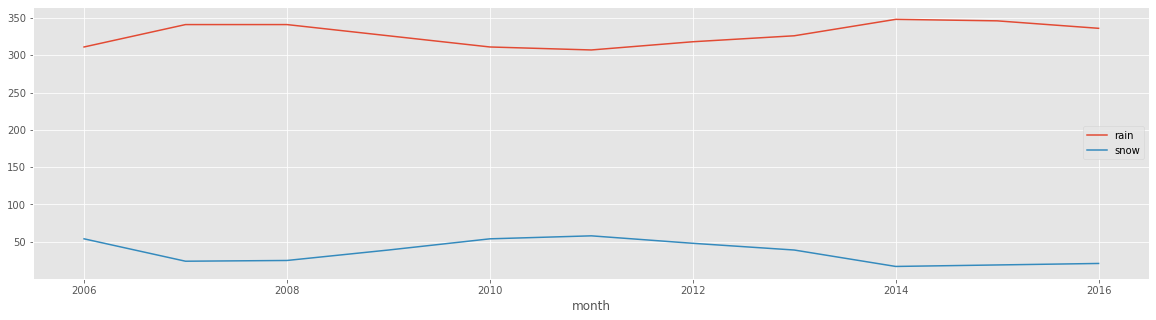

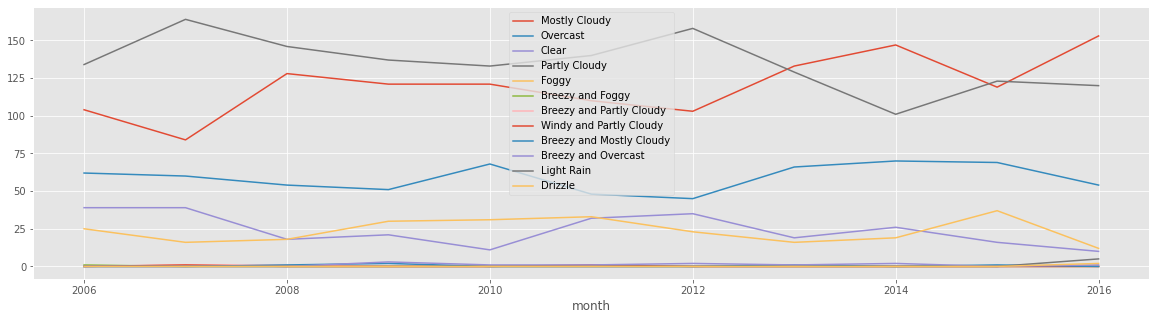

In [83]:
obj_d.index = pd.to_datetime(obj_d.index)
Precip_Type_df = pd.DataFrame(obj_d['Precip Type'])
Summary_df = pd.DataFrame(obj_d['Summary'])
Daily_Summary_df = pd.DataFrame(obj_d['Daily Summary'])

obj_d_Precip_Type_year = pd.get_dummies(Precip_Type_df, prefix=[''], prefix_sep='').groupby(pd.Grouper(freq='1Y')).sum()
obj_d_Summary_year = pd.get_dummies(Summary_df, prefix=[''], prefix_sep='').groupby(pd.Grouper(freq='1Y')).sum()
obj_d_Daily_Summary_year = pd.get_dummies(Daily_Summary_df, prefix=[''], prefix_sep='').groupby(pd.Grouper(freq='1Y')).sum()

obj_d_Precip_Type_year['month'] = pd.to_datetime(obj_d_Precip_Type_year.index)
obj_d_Precip_Type_year['month'] = obj_d_Precip_Type_year['month'].apply(lambda x: x.strftime('%Y'))

obj_d_Summary_year['month'] = pd.to_datetime(obj_d_Precip_Type_year.index)
obj_d_Summary_year['month'] = obj_d_Summary_year['month'].apply(lambda x: x.strftime('%Y'))


obj_d_Daily_Summary_year['month'] = pd.to_datetime(obj_d_Precip_Type_year.index)
obj_d_Daily_Summary_year['month'] = obj_d_Daily_Summary_year['month'].apply(lambda x: x.strftime('%Y'))



obj_d_Precip_Type_year = obj_d_Precip_Type_year.plot.line(x='month', y=list(Precip_Type_df['Precip Type'].unique()), figsize=(20,5))
obj_d_Summary_year = obj_d_Summary_year.plot.line(x='month', y=list(Summary_df['Summary'].unique()), figsize=(20,5))
#obj_d_Daily_Summary_year = obj_d_Daily_Summary_year.plot.line(x='month', y=list(Daily_Summary_df['Daily Summary'].unique()))
#obj_d_Summary_year = Summary_df
#obj_d_Precip_Type_year = Daily_Summary_df

### Categorical to continuous analysis

#### Precip Type to Numeric Analysis

In [99]:
d = data.copy()
d.index = pd.to_datetime(d['date'])
d_num = d.groupby(pd.Grouper(freq='3D'))[num_columns].mean()
d_obj = d.groupby(pd.Grouper(freq='3D'))[obj_columns].agg(lambda x: x.value_counts().index[0])
d = pd.concat([d_num, d_obj], axis=1)
d.reset_index(inplace=True)
d['month_year'] = d['date'].apply(lambda x: x.strftime('%B-%Y'))
d

date  Temperature (C)  Apparent Temperature (C)  Humidity  \
0    2006-01-01         0.416224                  0.422347  0.853750   
1    2006-01-04         0.393938                  0.418589  0.933611   
2    2006-01-07         0.343351                  0.381978  0.867222   
3    2006-01-10         0.341141                  0.392438  0.864861   
4    2006-01-13         0.329145                  0.356957  0.892639   
...         ...              ...                       ...       ...   
1335 2016-12-19         0.366019                  0.374550  0.891806   
1336 2016-12-22         0.362310                  0.371064  0.891528   
1337 2016-12-25         0.359062                  0.367360  0.890139   
1338 2016-12-28         0.356296                  0.364604  0.889583   
1339 2016-12-31         0.354697                  0.363312  0.888750   

      Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0              0.247142                0.513038         0.602097   
1              0.139701                0.411560         0.361278   
2              0.089984                0.407227         0.455514   
3              0.070478                0.613781         0.323944   
4              0.107924                0.385020         0.324653   
...                 ...                     ...              ...   
1335           0.173706                0.503907         0.455458   
1336           0.171160                0.510252         0.454139   
1337           0.171790                0.515901         0.453639   
1338           0.170543                0.518338         0.454056   
1339           0.168589                0.518802         0.454708   

      Pressure (millibars)        Summary Precip Type  \
0                 0.969443       Overcast        rain   
1                 0.936950       Overcast        rain   
2                 0.987518  Partly Cloudy        snow   
3                 0.960163  Mostly Cloudy        snow   
4                 0.991083          Foggy        snow   
...                    ...            ...         ...   
1335              0.974870  Mostly Cloudy        rain   
1336              0.974959  Mostly Cloudy        rain   
1337              0.975050  Mostly Cloudy        rain   
1338              0.975138  Mostly Cloudy        snow   
1339              0.975194  Mostly Cloudy        snow   

                                          Daily Summary     month_year  
0                     Mostly cloudy throughout the day.   January-2006  
1                                 Foggy in the morning.   January-2006  
2     Foggy starting overnight continuing until morn...   January-2006  
3     Foggy starting overnight continuing until morn...   January-2006  
4                                 Foggy in the morning.   January-2006  
...                                                 ...            ...  
1335                  Mostly cloudy throughout the day.  December-2016  
1336                  Mostly cloudy throughout the day.  December-2016  
1337                  Mostly cloudy throughout the day.  December-2016  
1338                  Mostly cloudy throughout the day.  December-2016  
1339                  Mostly cloudy throughout the day.  December-2016  

[1340 rows x 12 columns]

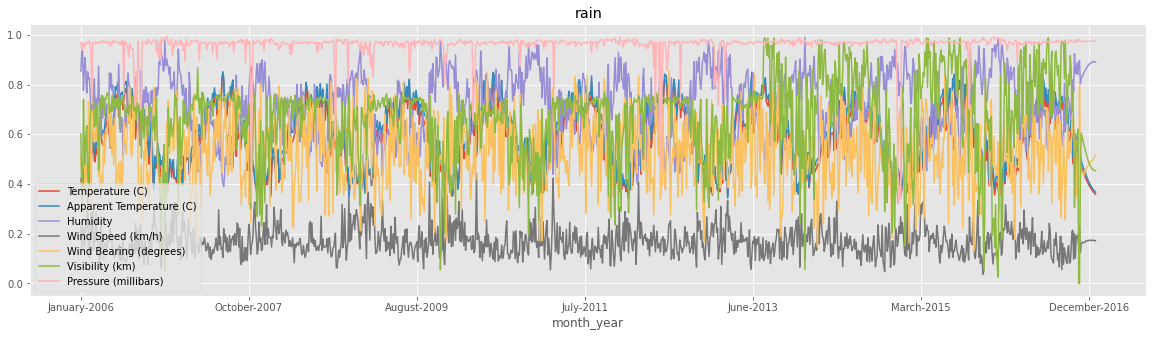

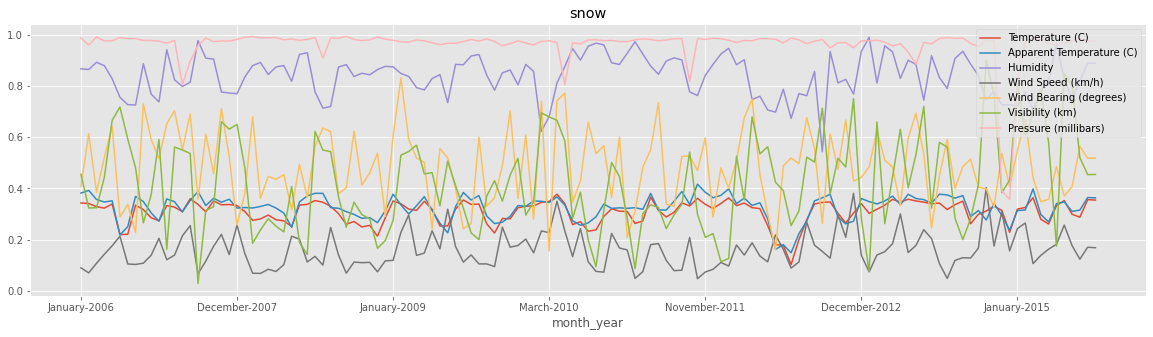

In [100]:
precip_type_num = d.groupby('Precip Type')[num_columns+['month_year']]

for n, d in precip_type_num:
  d.plot(x='month_year', y=num_columns, title=n, figsize=(20,5))

#### Summary to Numeric Analysis

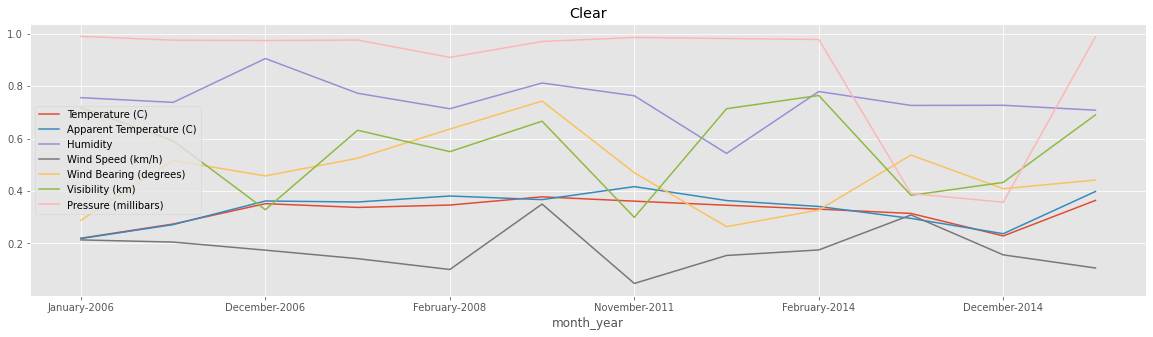

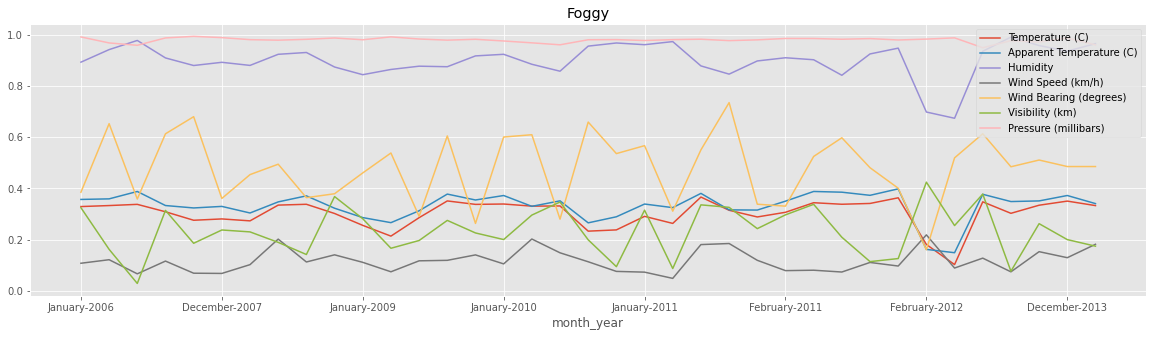

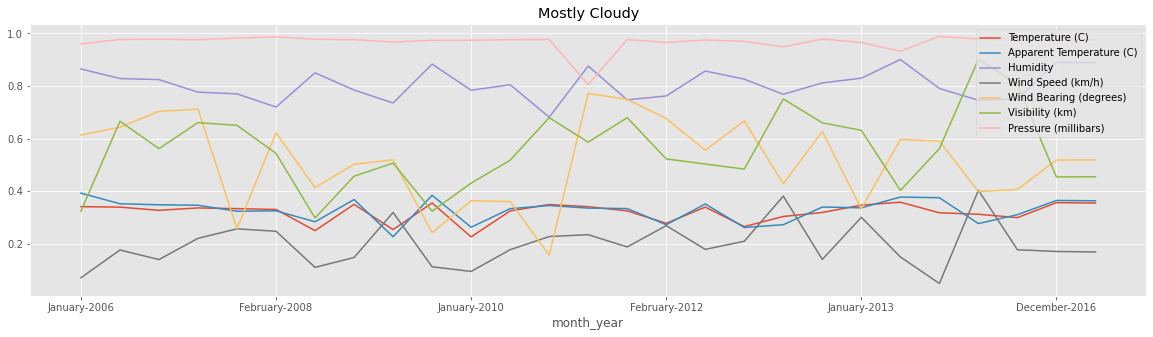

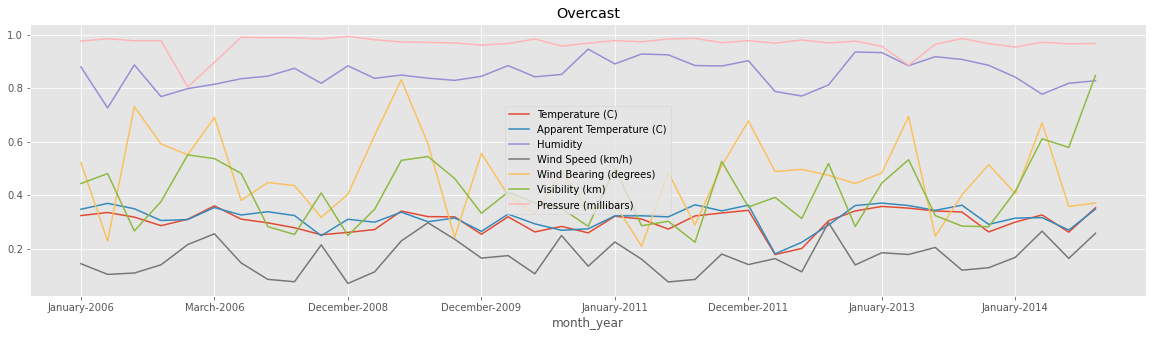

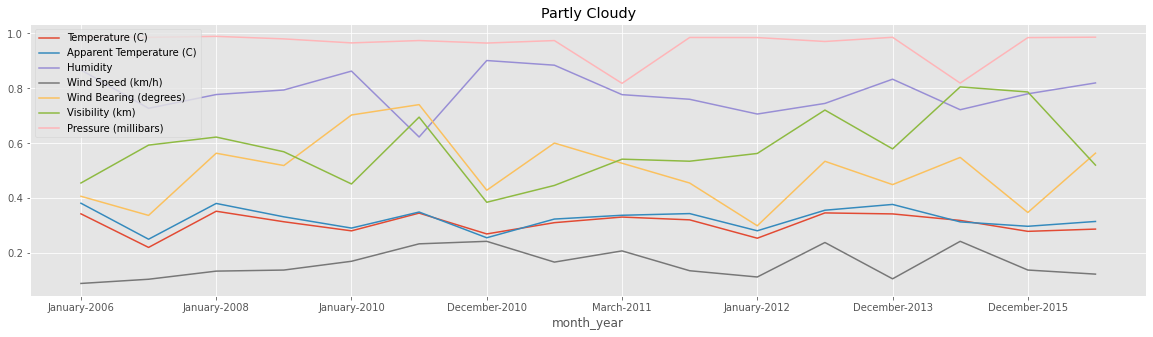

In [103]:

precip_type_num = d.groupby('Summary')[num_columns+['month_year']]

for n, d in precip_type_num:
    d.plot(x='month_year', y=num_columns, title=n, figsize=(20,5))

#### Daily Summary to Numeric Analysis

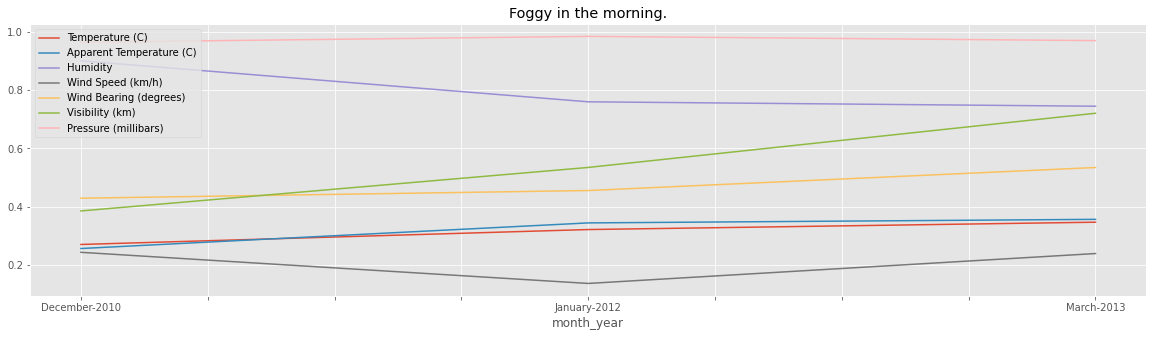

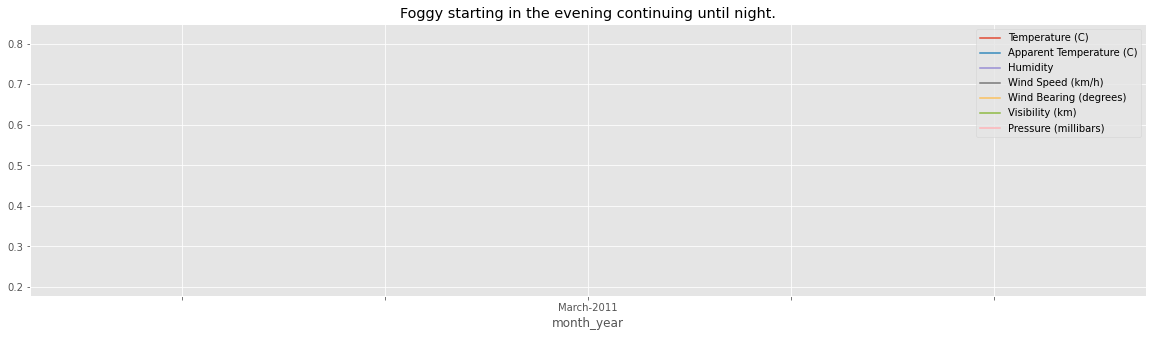

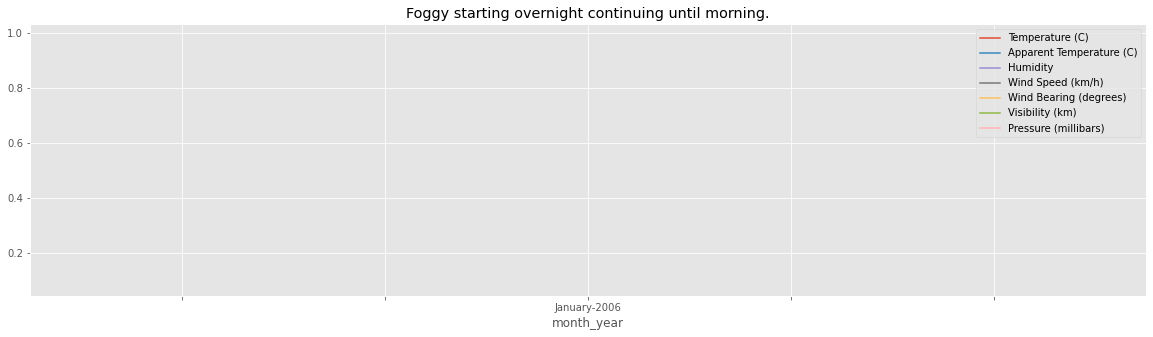

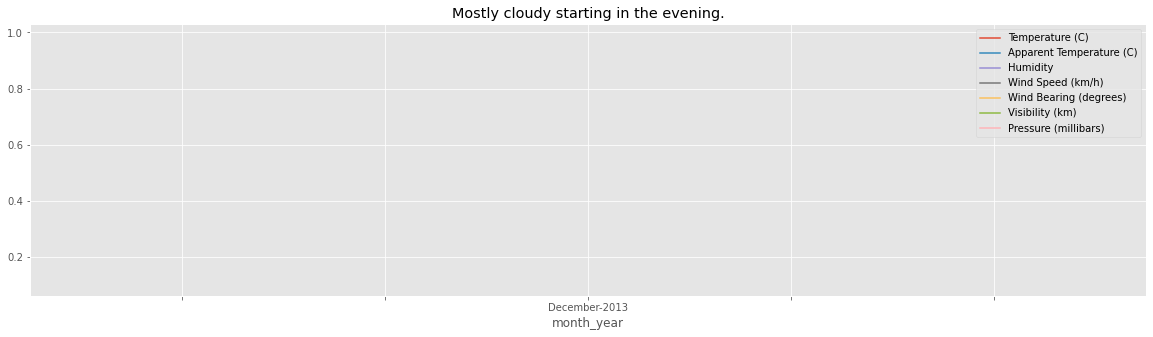

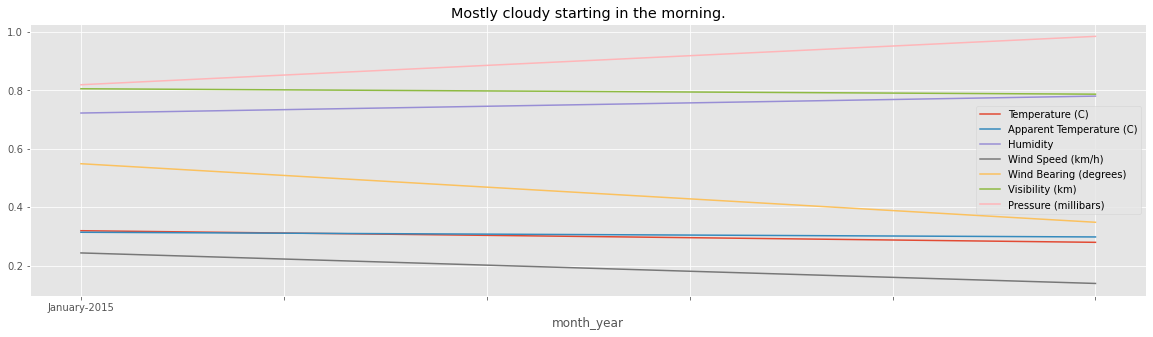

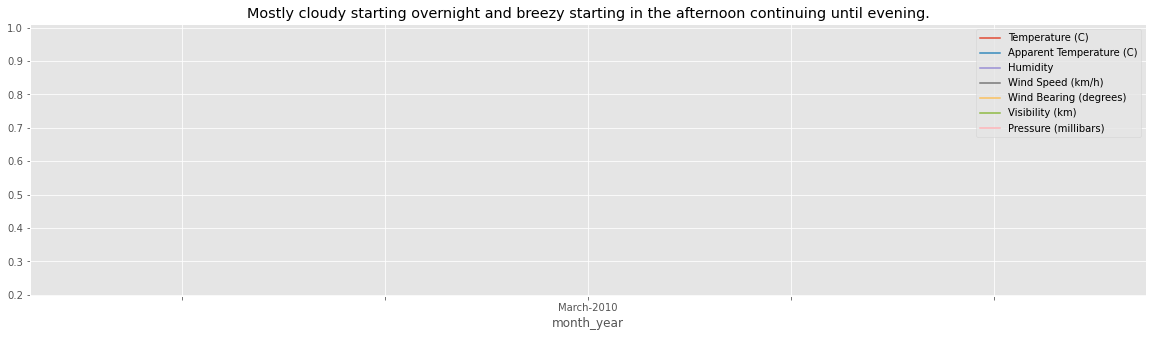

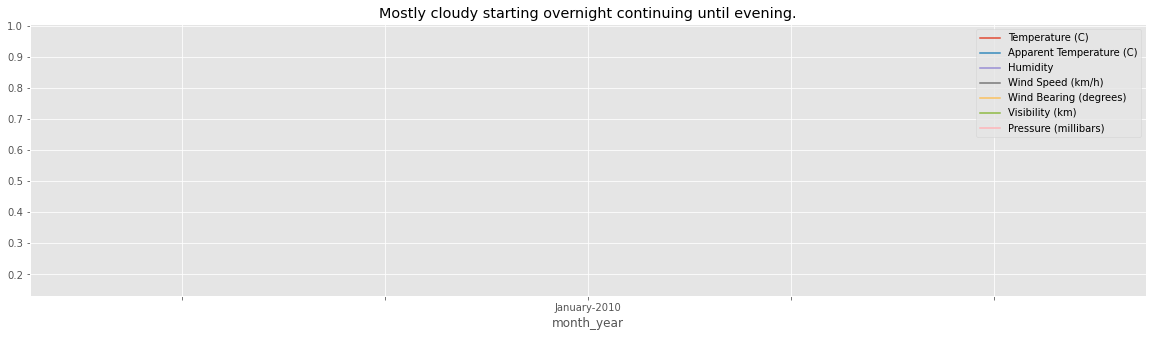

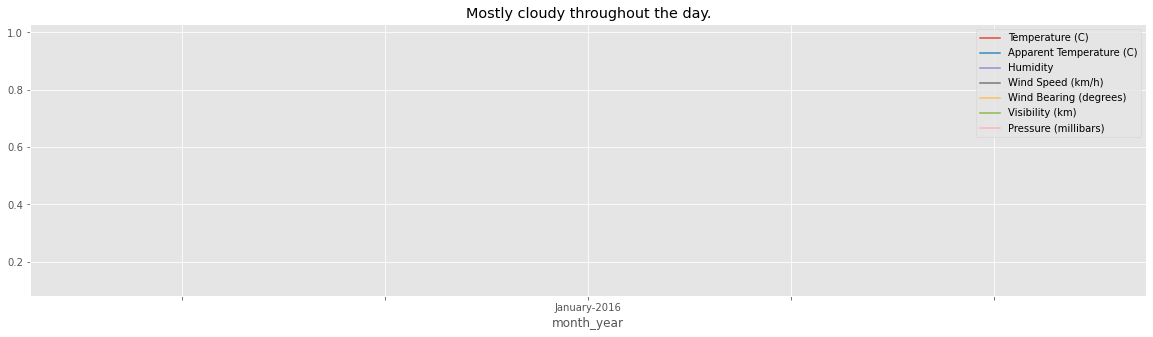

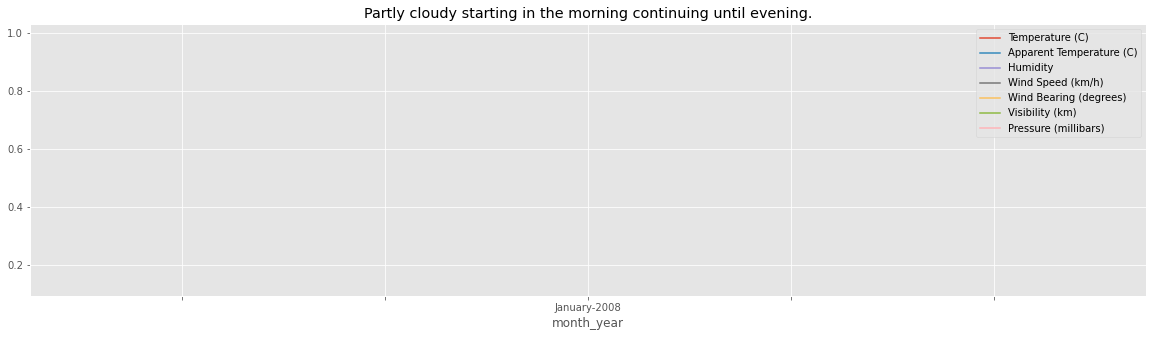

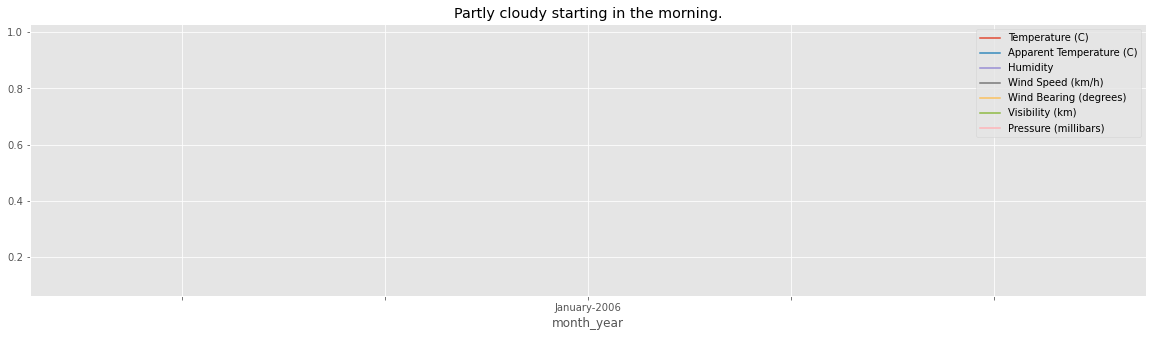

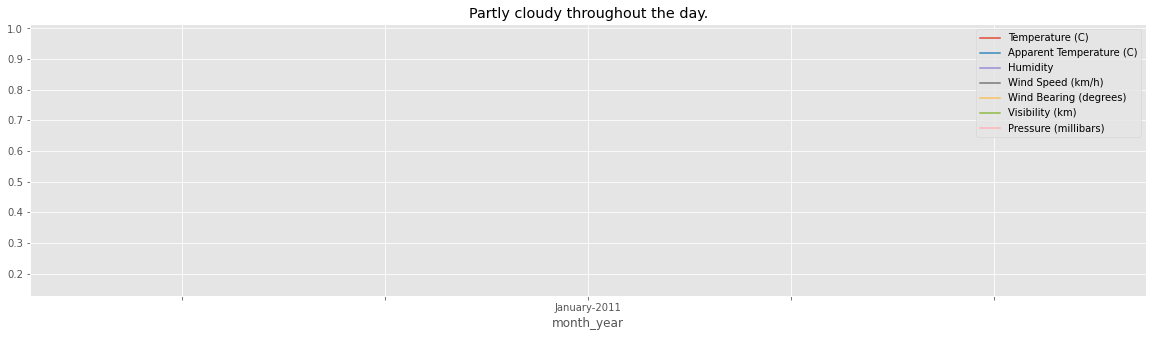

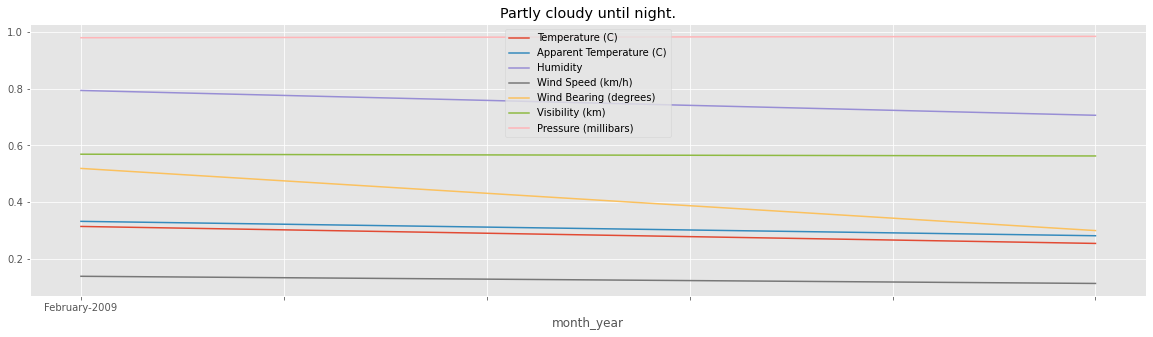

In [104]:
#d['month_year'] = data['date'].apply(lambda x: x.strftime('%B-%Y'))
precip_type_num = d.groupby('Daily Summary')[num_columns+['month_year']]

for n, d in precip_type_num:
    d.plot(x='month_year', y=num_columns, title=n, figsize=(20,5))

### Decompose Numeric columns

In [105]:
d = data.copy()
d.index = pd.to_datetime(d['date'])
dd_mean = d.resample('M').mean()

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

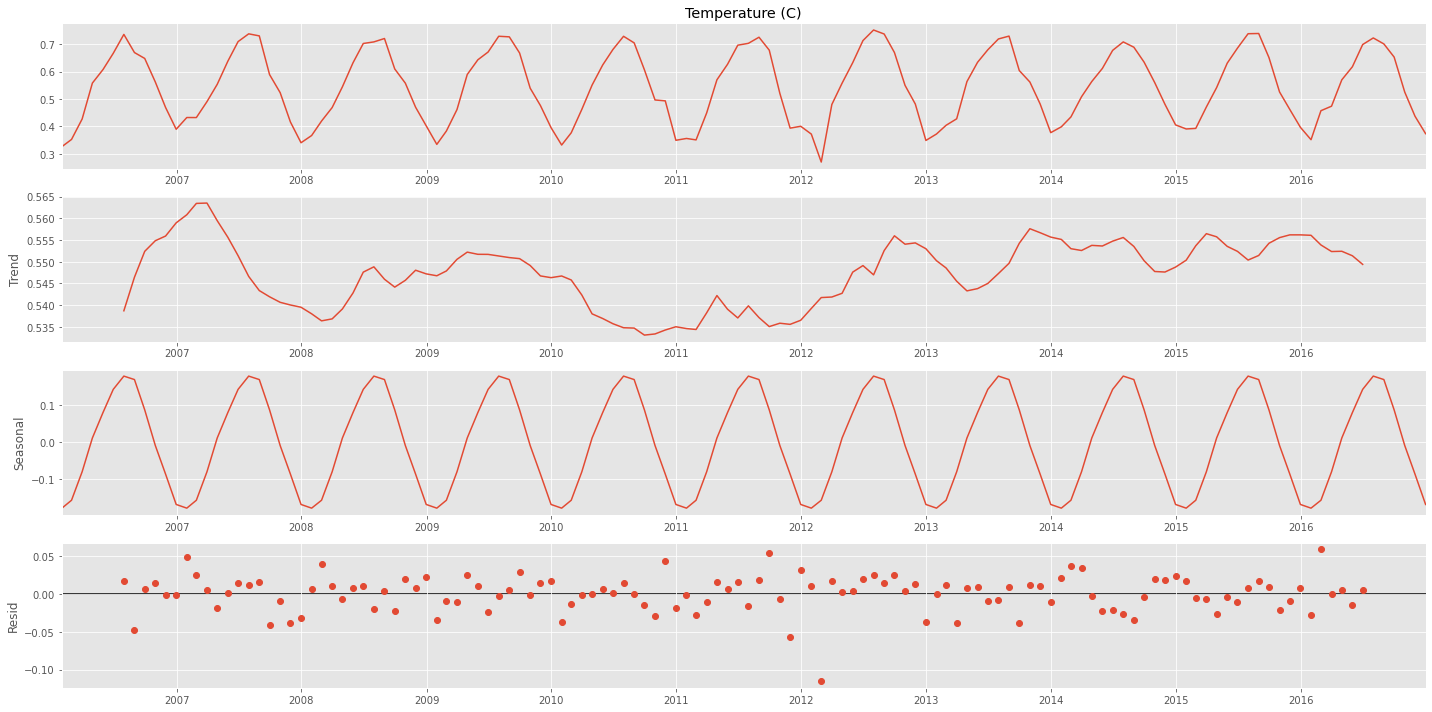

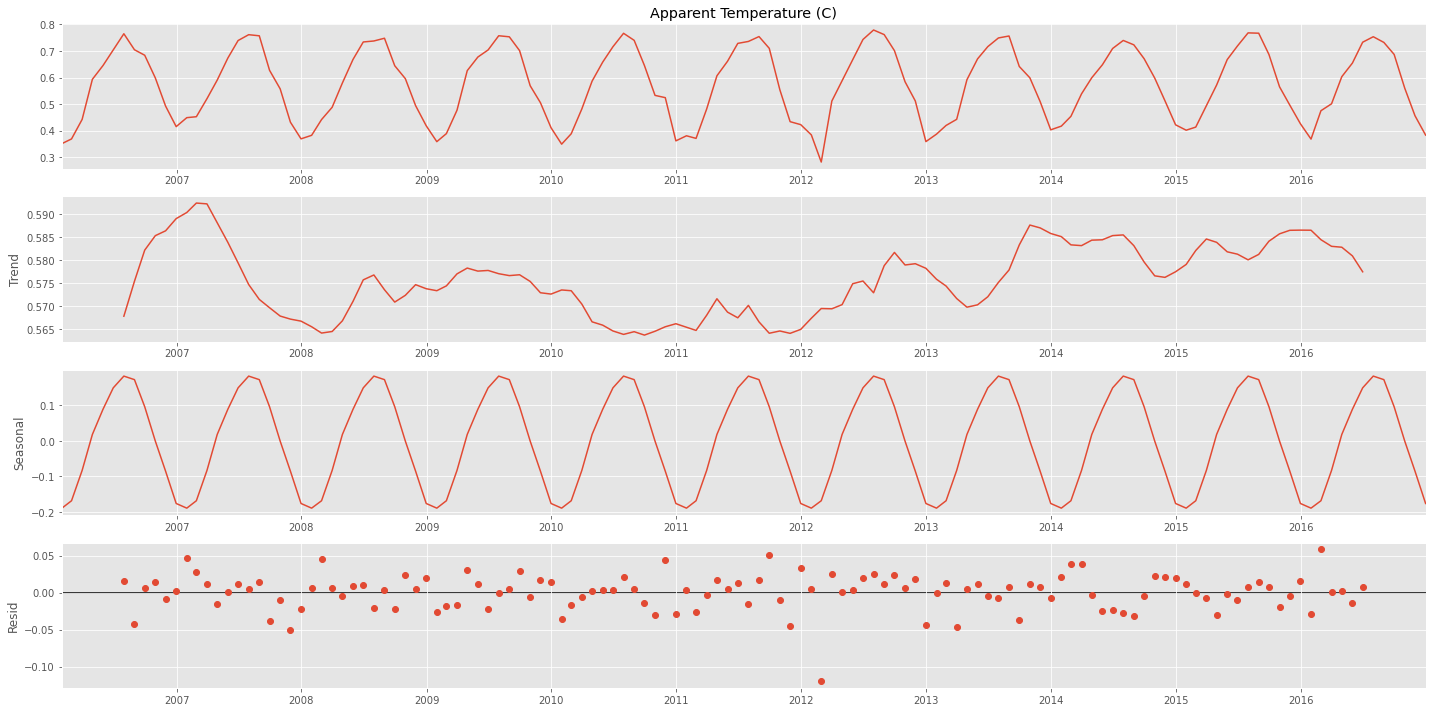

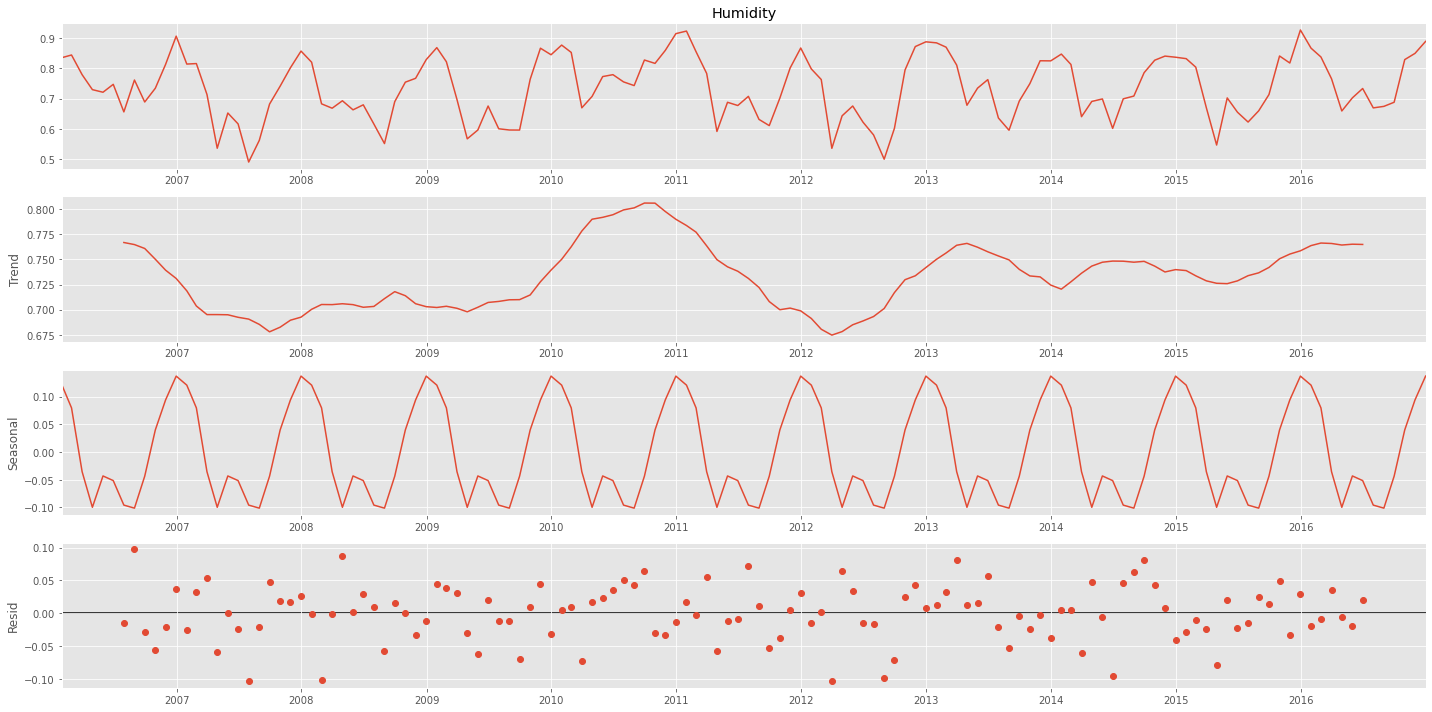

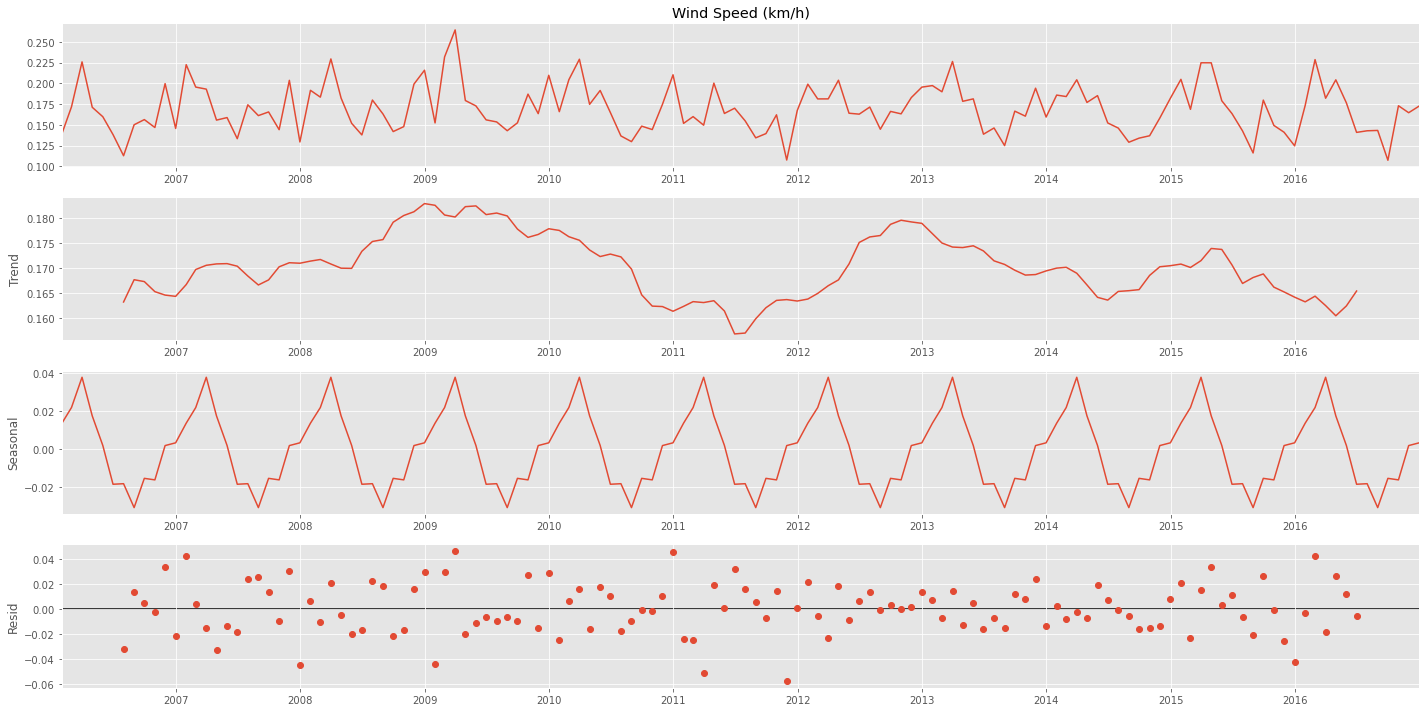

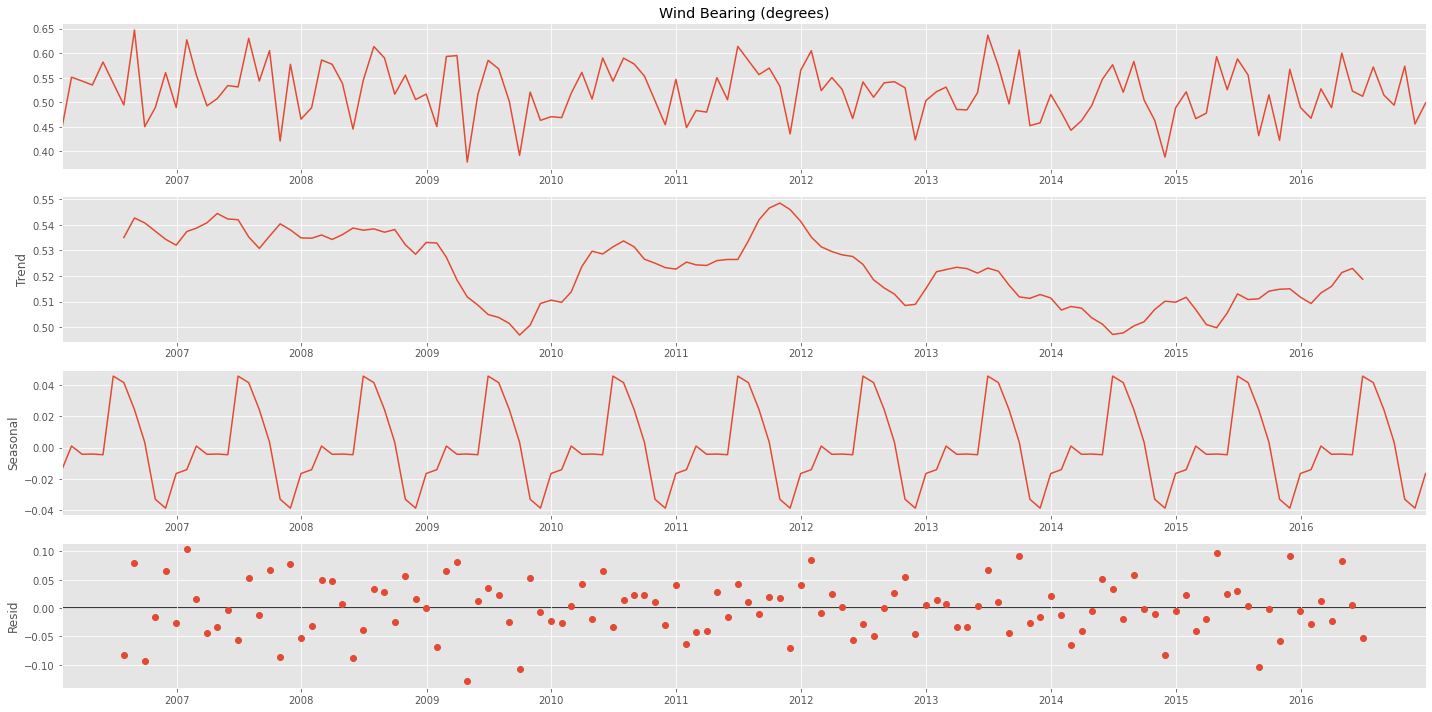

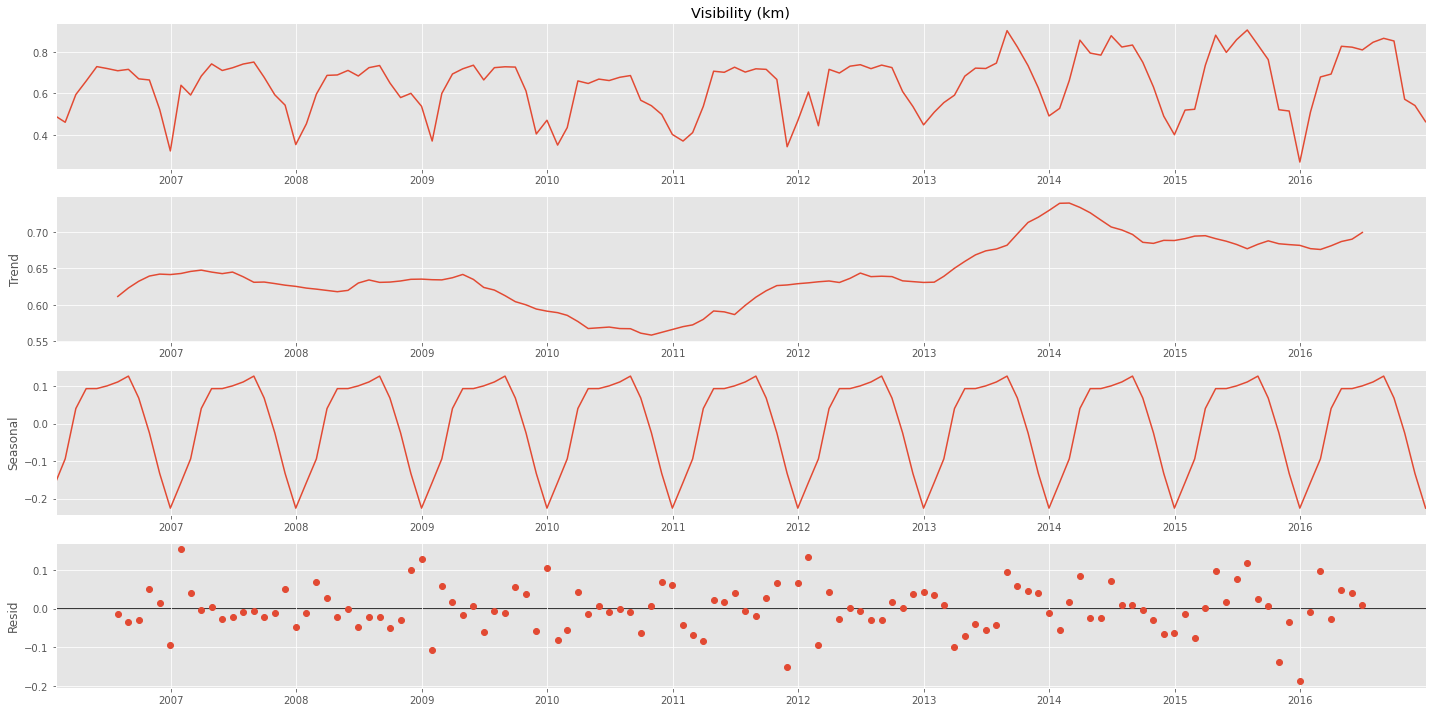

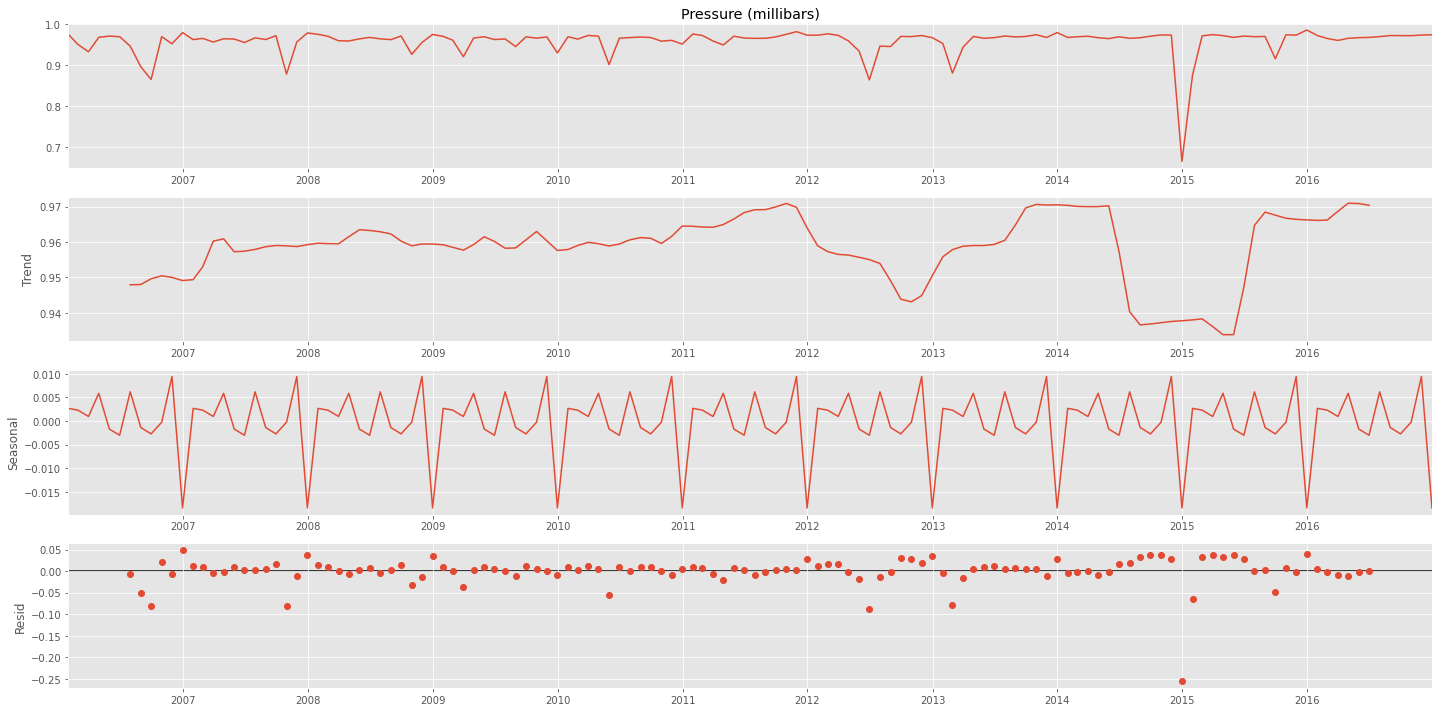

In [107]:
plt.rcParams['figure.figsize'] = [20, 10]
for col in num_columns:
    r =seasonal_decompose(dd_mean[col], model='Additive', period=12)
    r.plot()

### Numeric Features Test

In [108]:
d = data.copy()
d.index = pd.to_datetime(d['date'])
print('before :', d.shape)
dd_mean = d.resample('M').mean()
dd_std = d.resample('M').std()
print('after :', dd_std.shape)

before : (95936, 14)
after : (132, 10)


In [109]:
dd_mean = dd_mean[num_columns]

In [110]:
dd_mean

Temperature (C)  Apparent Temperature (C)  Humidity  \
date                                                              
2006-01-31         0.326400                  0.351110  0.834651   
2006-02-28         0.352531                  0.368776  0.843393   
2006-03-31         0.426966                  0.442238  0.778654   
2006-04-30         0.558065                  0.593496  0.729528   
2006-05-31         0.607304                  0.645266  0.720968   
...                     ...                       ...       ...   
2016-08-31         0.700758                  0.732369  0.674516   
2016-09-30         0.652878                  0.687180  0.688069   
2016-10-31         0.525268                  0.560004  0.828231   
2016-11-30         0.437181                  0.456044  0.848713   
2016-12-31         0.373606                  0.383239  0.888051   

            Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
date                                                                     
2006-01-31           0.139416                0.447846         0.490745   
2006-02-28           0.171618                0.551229         0.460945   
2006-03-31           0.225781                0.543348         0.594859   
2006-04-30           0.171125                0.535256         0.660047   
2006-05-31           0.159772                0.582057         0.729694   
...                       ...                     ...              ...   
2016-08-31           0.143243                0.514882         0.866321   
2016-09-30           0.107329                0.494166         0.853475   
2016-10-31           0.172962                0.573515         0.572098   
2016-11-30           0.164584                0.455900         0.541825   
2016-12-31           0.172629                0.498787         0.463638   

            Pressure (millibars)  
date                              
2006-01-31              0.975930  
2006-02-28              0.951099  
2006-03-31              0.933096  
2006-04-30              0.968574  
2006-05-31              0.971564  
...                          ...  
2016-08-31              0.972873  
2016-09-30              0.972860  
2016-10-31              0.972616  
2016-11-30              0.974039  
2016-12-31              0.974738  

[132 rows x 7 columns]

In [116]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller


def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    if dfoutput['p-value'] <= 0.05:
        print(f'{timeseries.name} The series is stationary')
    else:
        print(f'{timeseries.name} The series is NOT stationary')
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    d = pd.concat([timeseries, rolmean, rolstd], axis=1)
    s = timeseries.name
    d.columns = [s, s+' rolling_mean', s+' rolling_std']
    d.plot()
    plt.show()


In [112]:
dd_mean.dropna(axis=0, inplace=True)
dd_std.dropna(axis=0, inplace=True)

______________________________ Temperature (C) ________________________________
Temperature (C) The series is NOT stationary


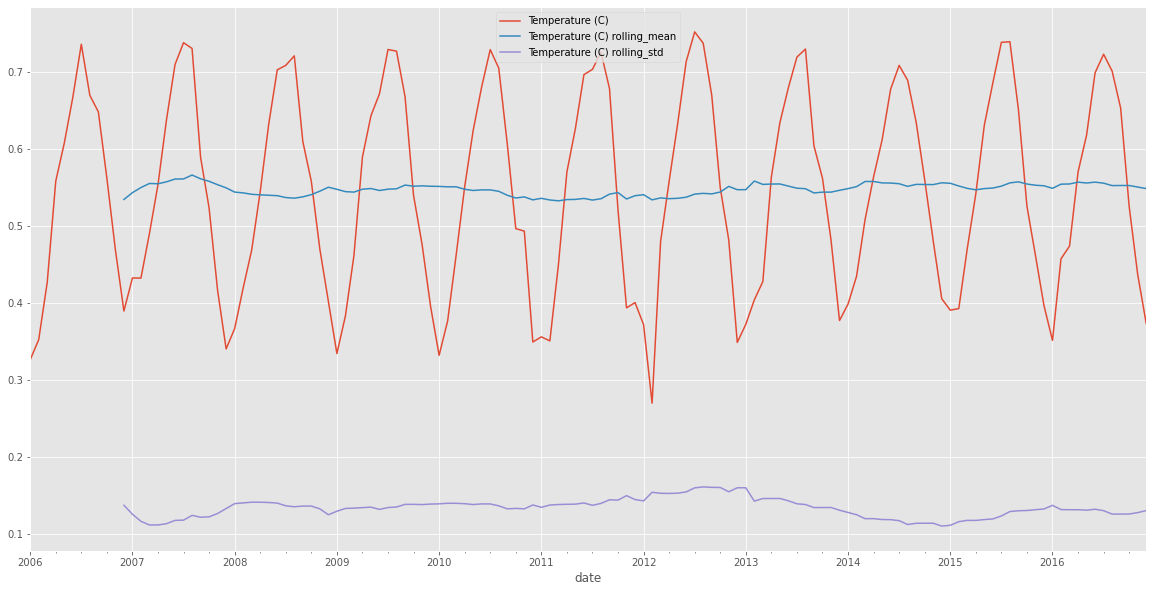


______________________________ Apparent Temperature (C) ________________________________
Apparent Temperature (C) The series is stationary


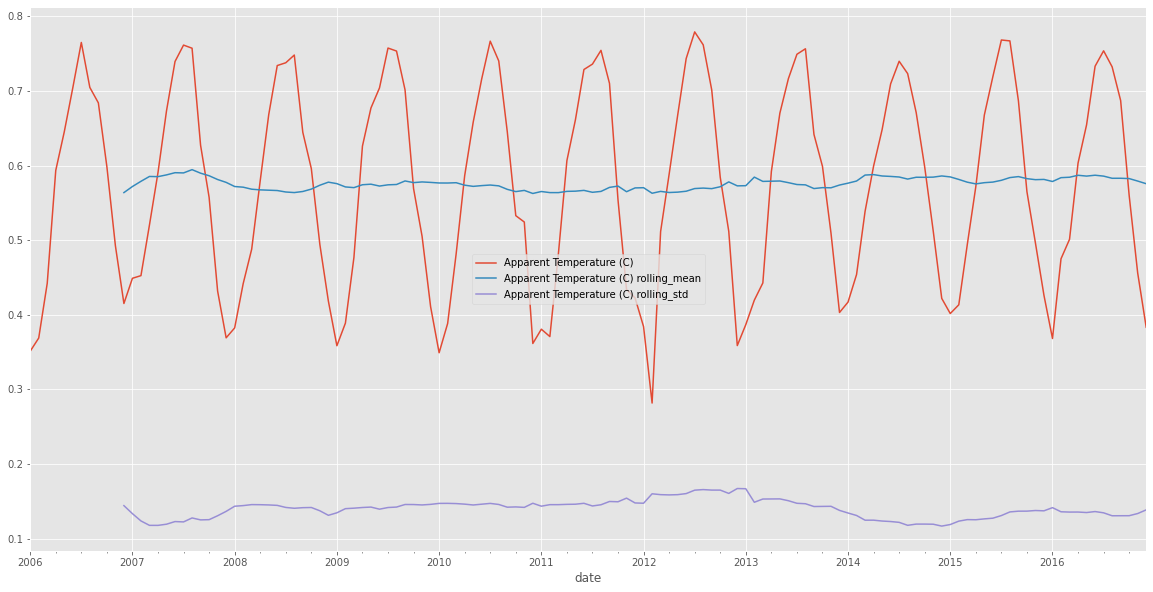


______________________________ Humidity ________________________________
Humidity The series is stationary


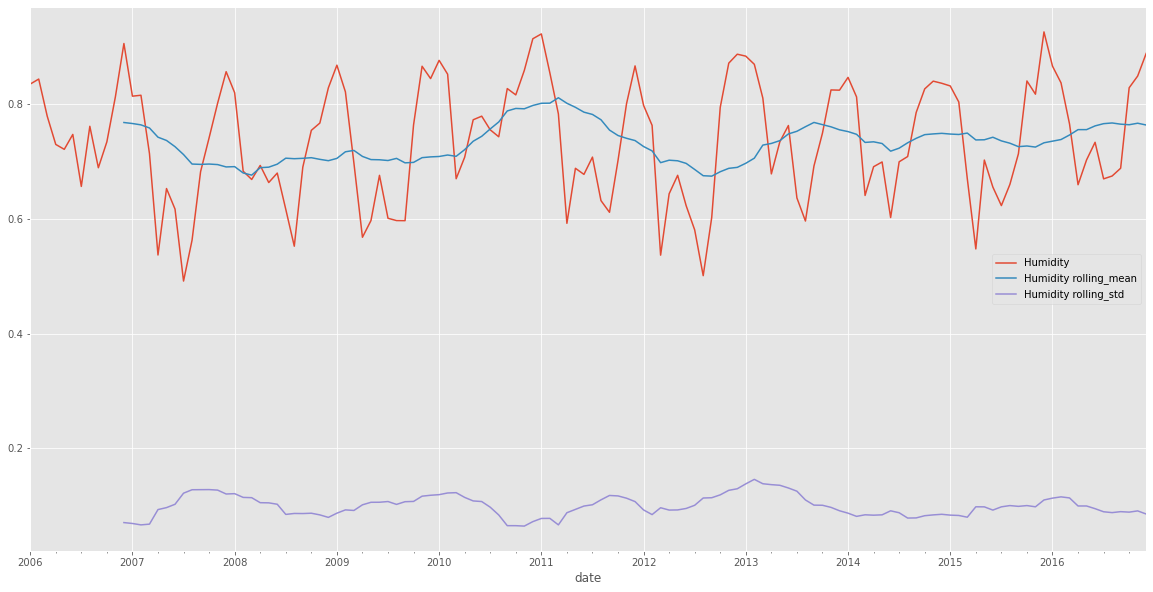


______________________________ Wind Speed (km/h) ________________________________
Wind Speed (km/h) The series is NOT stationary


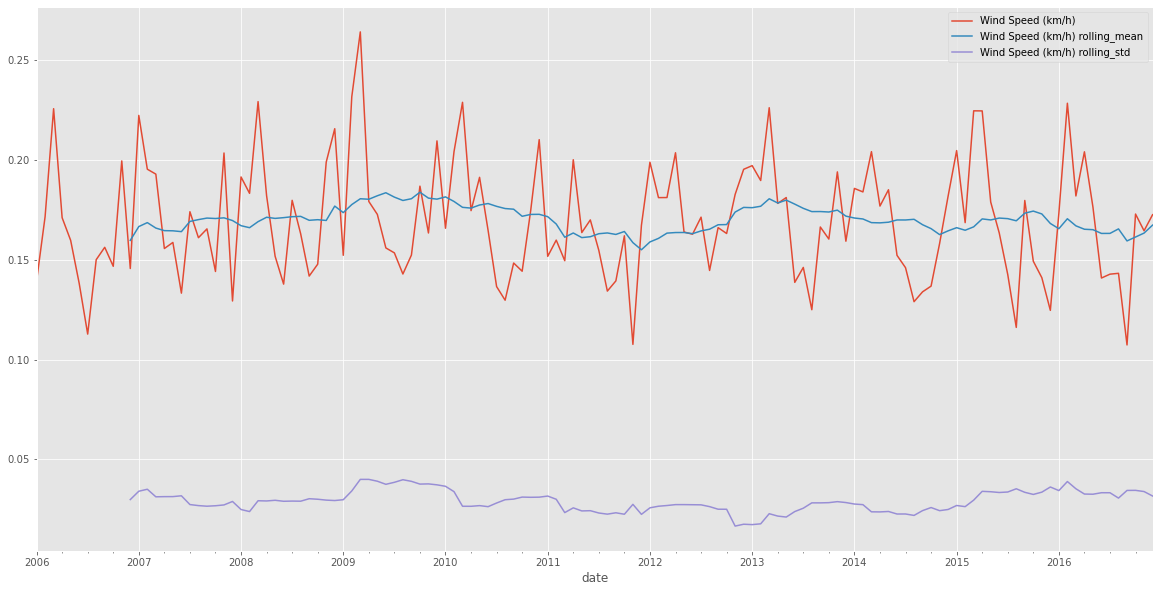


______________________________ Wind Bearing (degrees) ________________________________
Wind Bearing (degrees) The series is stationary


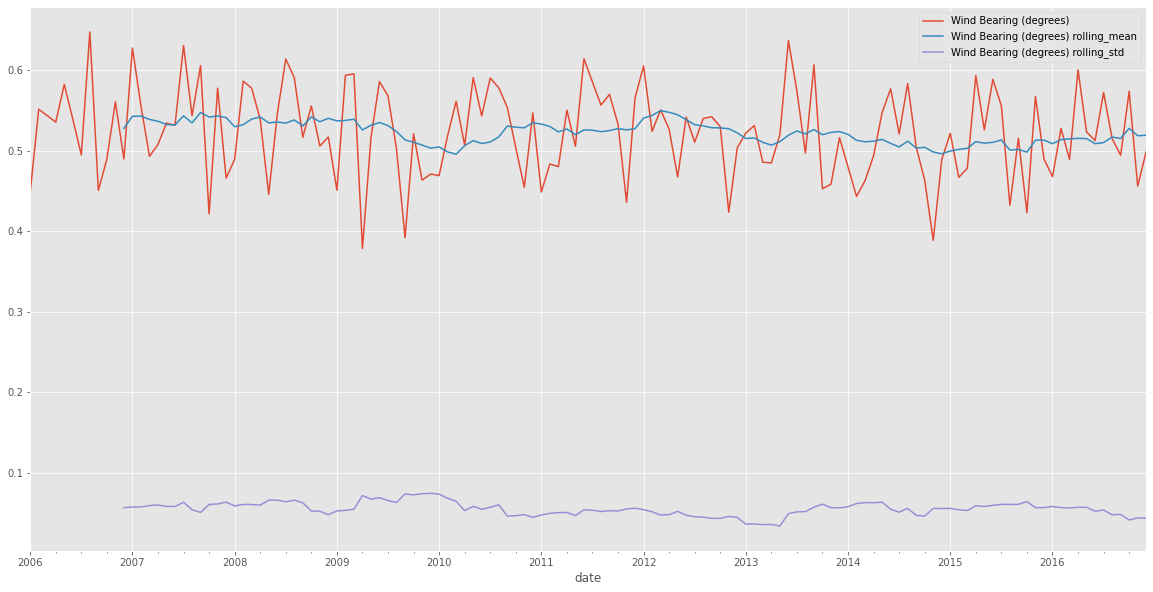


______________________________ Visibility (km) ________________________________
Visibility (km) The series is NOT stationary


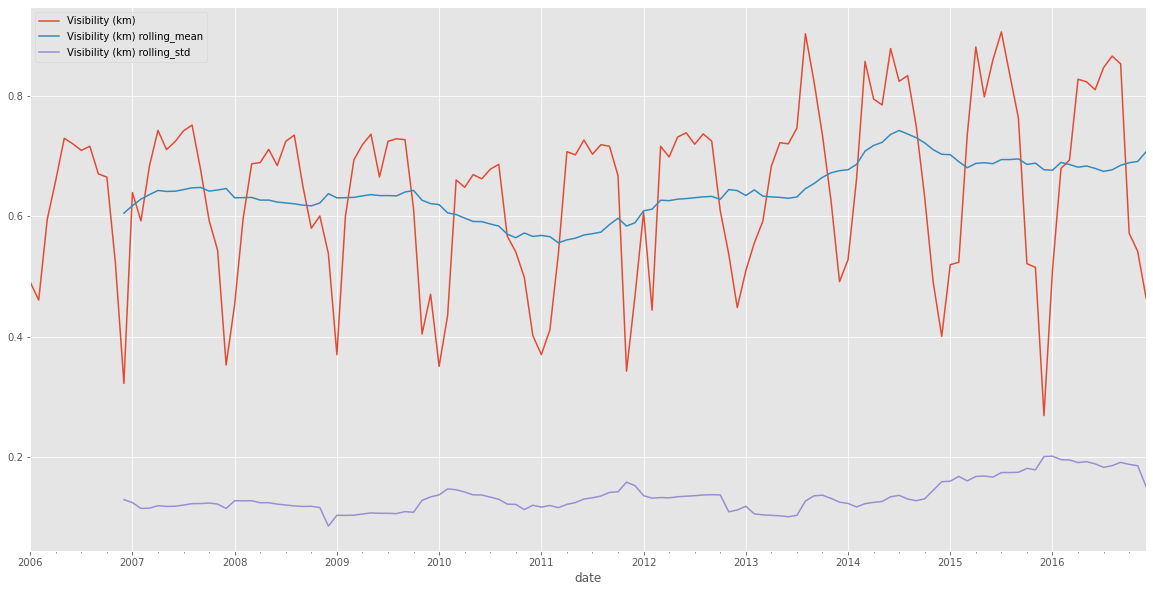


______________________________ Pressure (millibars) ________________________________
Pressure (millibars) The series is stationary


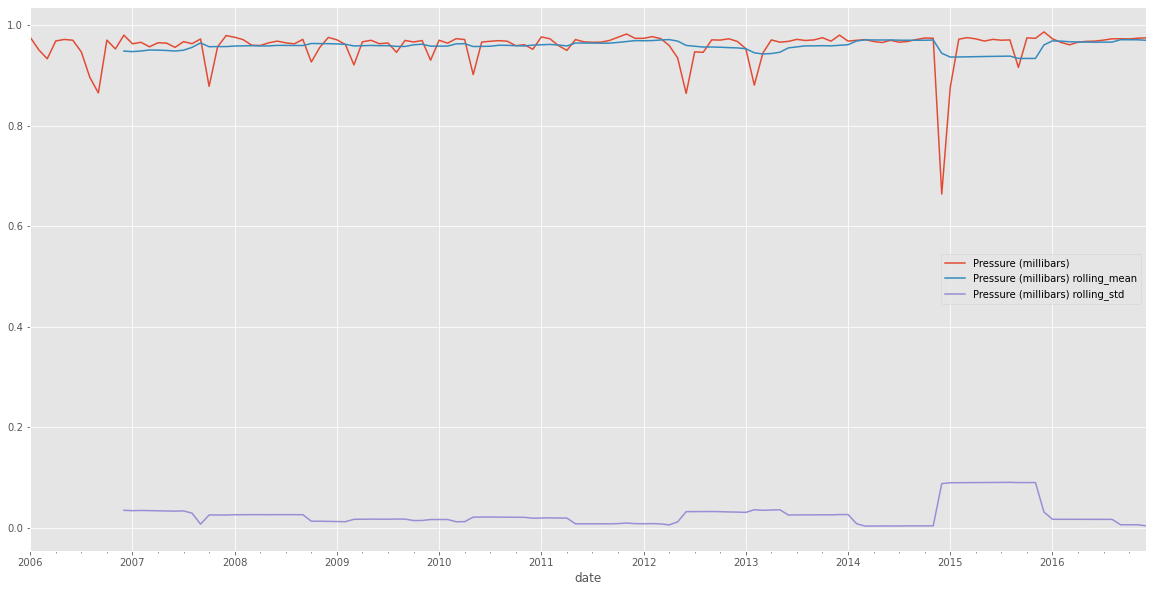

In [117]:
for col in num_columns:
    print(f'______________________________ {col} ________________________________')
    dftest(dd_mean[col])
    print()

In [118]:
import statsmodels.api as sm

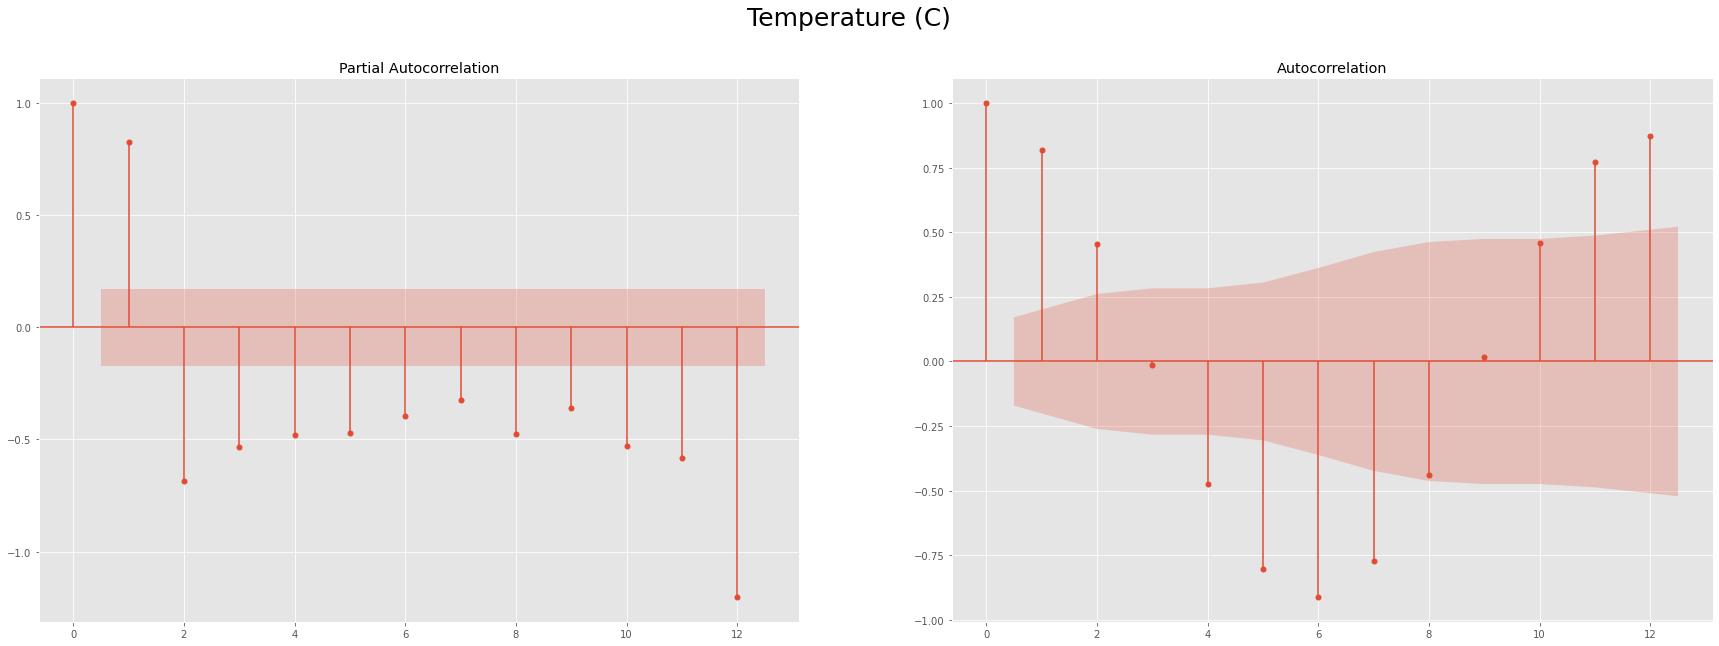

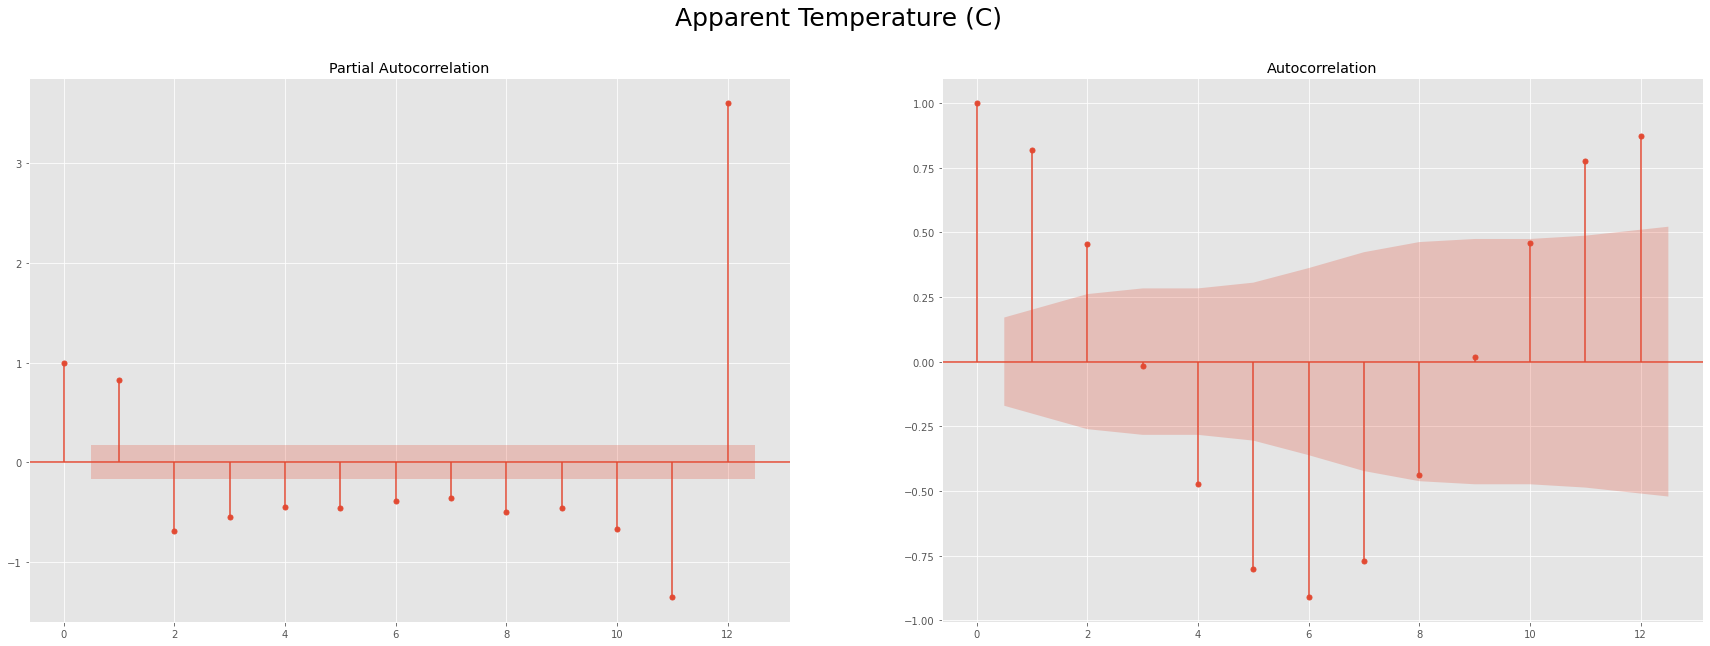

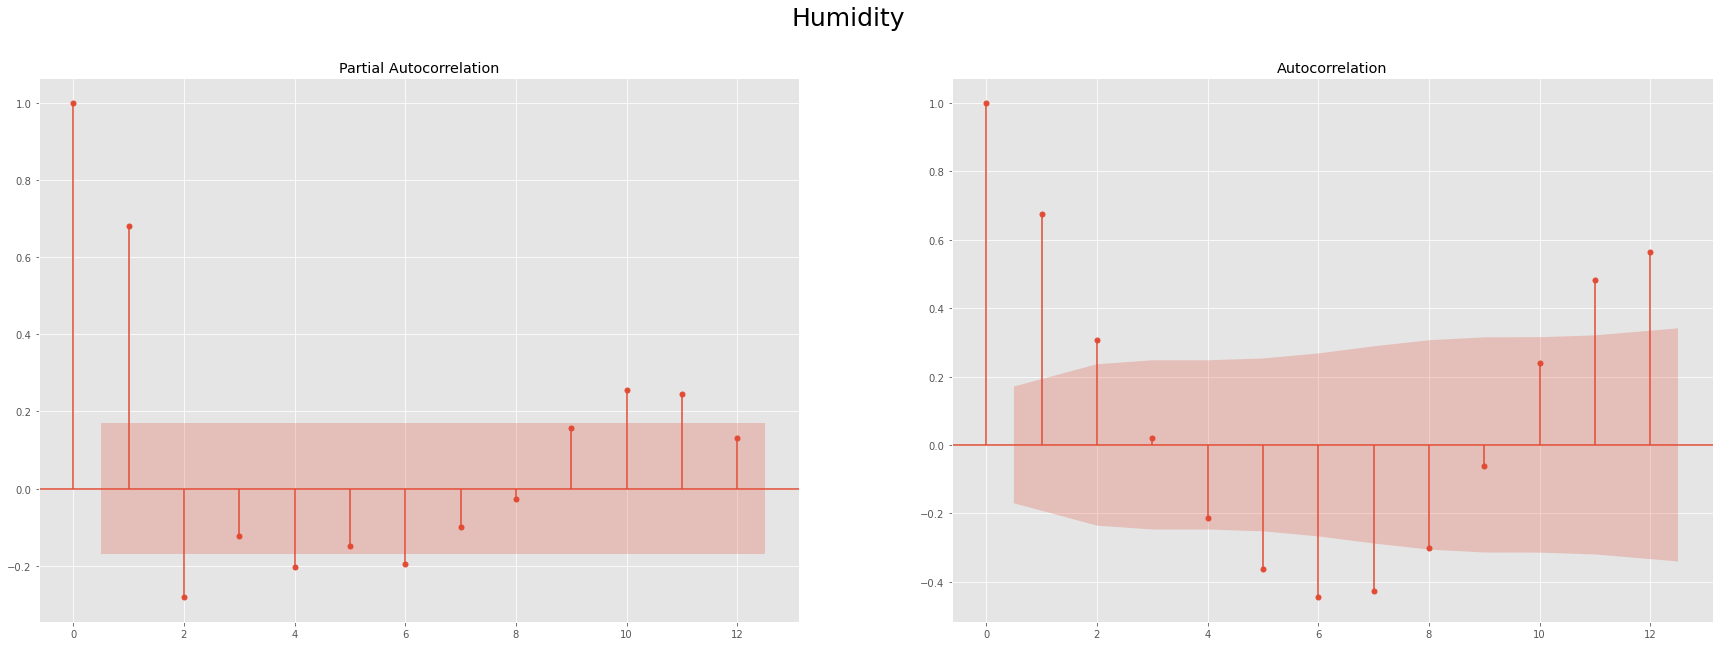

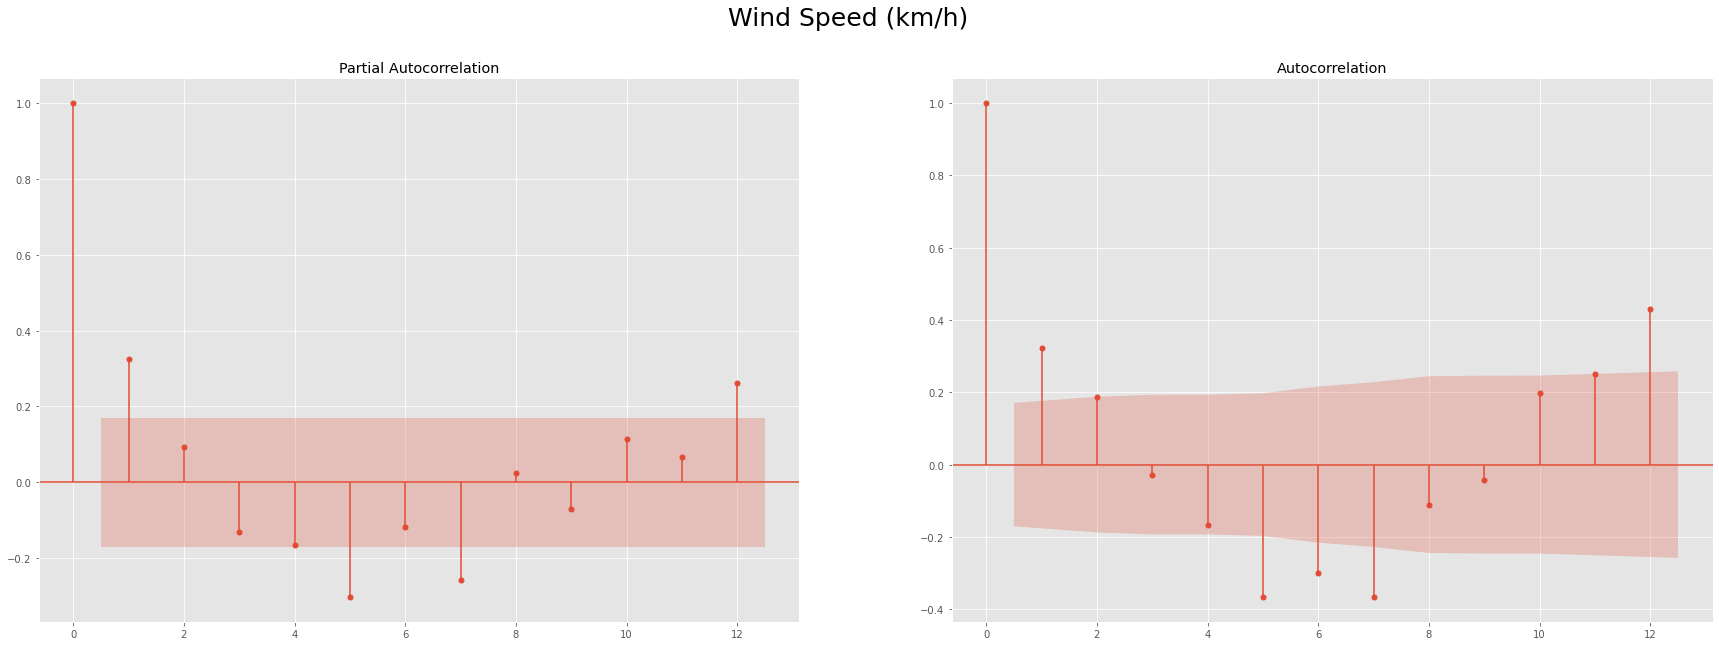

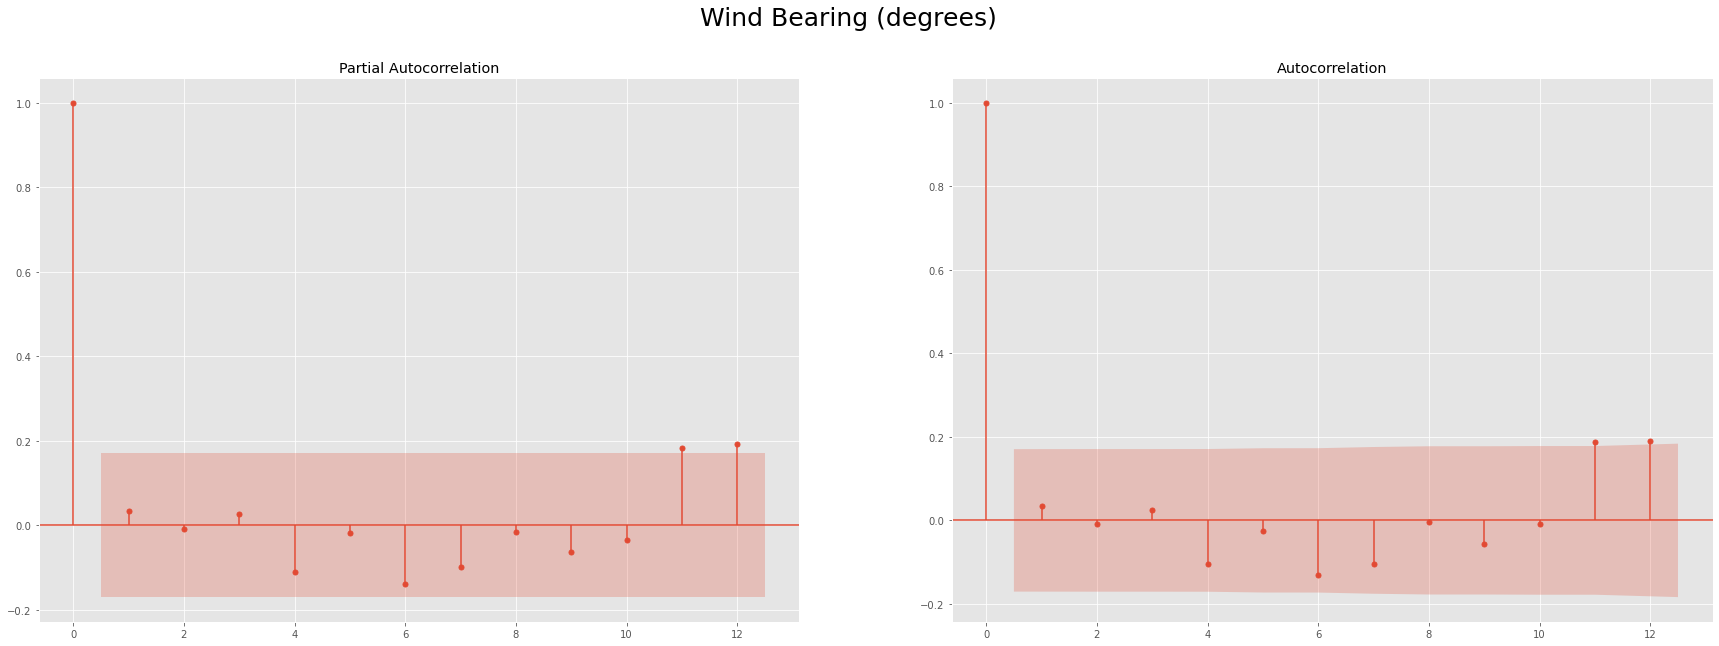

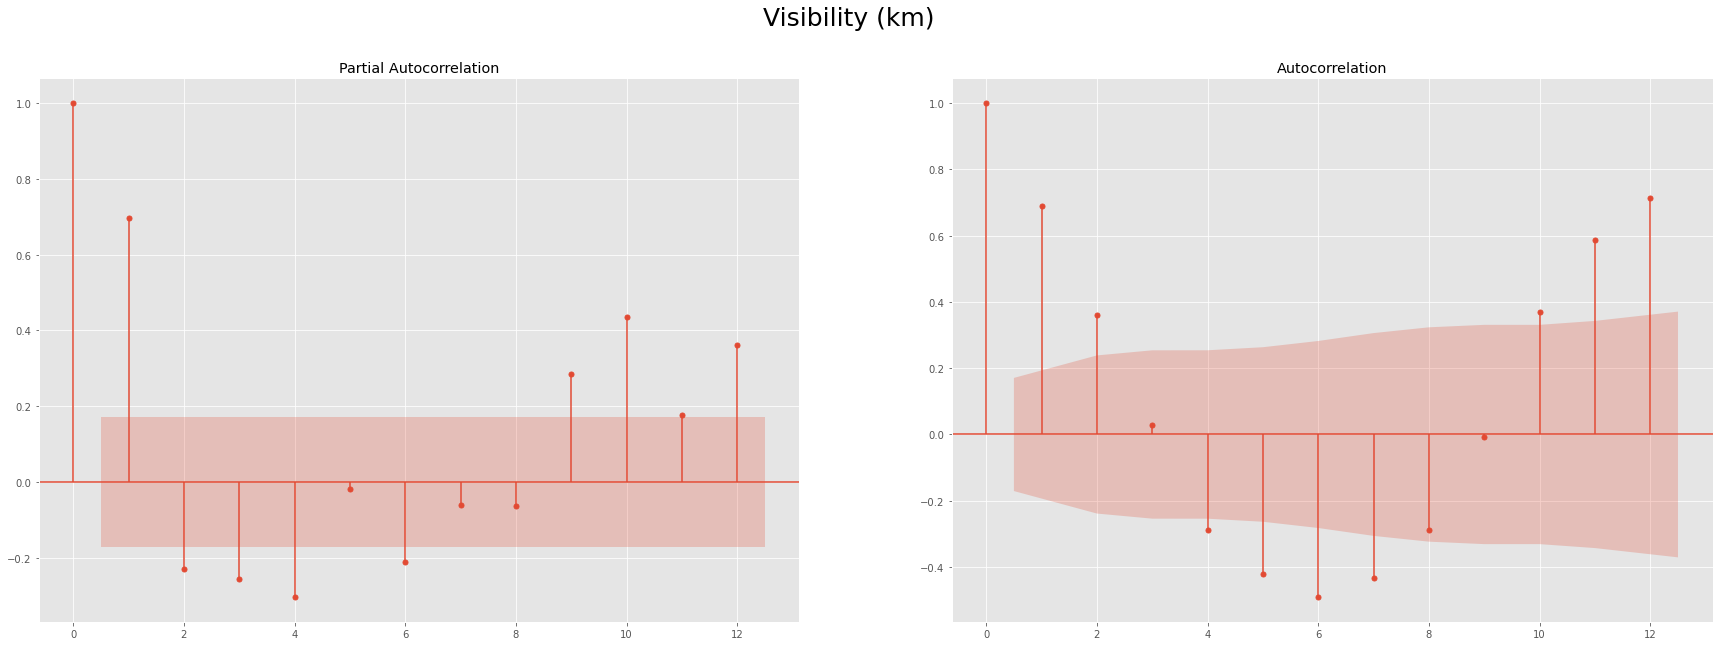

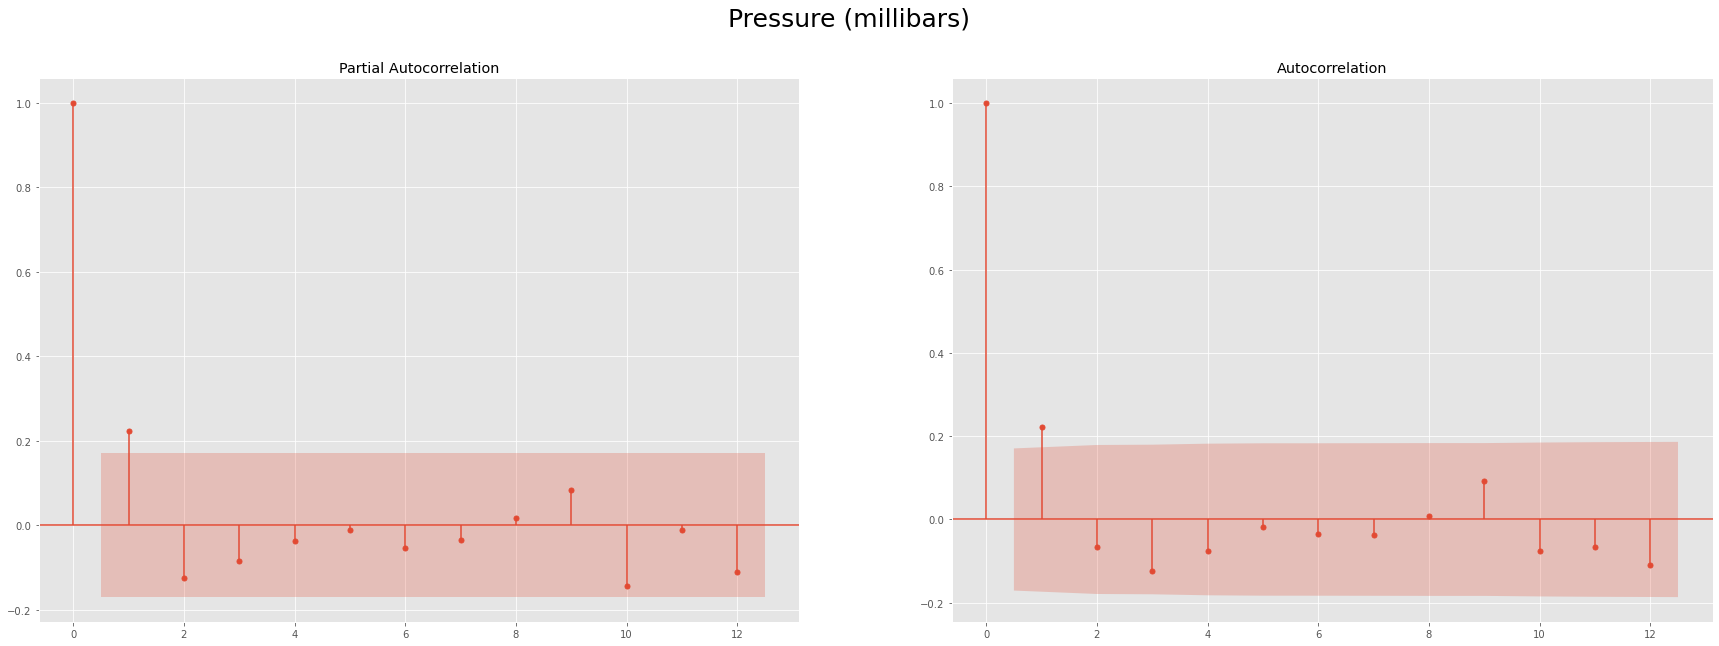

In [119]:
# for determinr seaosnal order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
for col in num_columns:
# P 
    f,ax = plt.subplots(1, 2, figsize=(30,10))
    plot_pacf(dd_mean[col], lags =12, ax=ax[0])
    
    
# Q
    plot_acf(dd_mean[col], lags =12, ax=ax[1])
    f.suptitle(col, fontsize = 25)
    f.show()
  

### Forecast for next year

In [120]:
#Introducing another model
sar2 = sm.tsa.statespace.SARIMAX(dd_mean['Temperature (C)'].iloc[:90,], 
                                order=(3,1,1),
                                seasonal_order=(12,1,8,12), 
                                trend='c').fit()

In [121]:
sar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 SARIMAX Results                                                  
==================================================================================================================
Dep. Variable:                                            Temperature (C)   No. Observations:                   90
Model:             SARIMAX(3, 1, 1)x(12, 1, [1, 2, 3, 4, 5, 6, 7, 8], 12)   Log Likelihood                 151.007
Date:                                                    Fri, 13 May 2022   AIC                           -250.014
Time:                                                            17:56:07   BIC                           -189.075
Sample:                                                        01-31-2006   HQIC                          -225.639
                                                             - 06-30-2013                                         
Covariance Type:                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0015      0.044     -0.033      0.973      -0.088       0.085
ar.L1         -0.2651      0.587     -0.451      0.652      -1.416       0.886
ar.L2         -0.2000      0.448     -0.446      0.655      -1.078       0.678
ar.L3          0.0714      0.310      0.230      0.818      -0.537       0.680
ma.L1         -0.5168      0.583     -0.887      0.375      -1.659       0.625
ar.S.L12      -0.7083     40.778     -0.017      0.986     -80.631      79.214
ar.S.L24      -0.2760     32.740     -0.008      0.993     -64.446      63.894
ar.S.L36      -0.1828      4.644     -0.039      0.969      -9.284       8.919
ar.S.L48      -0.2953     10.575     -0.028      0.978     -21.021      20.431
ar.S.L60      -0.2318     18.191     -0.013      0.990     -35.886      35.422
ar.S.L72       0.0063     24.387      0.000      1.000     -47.792      47.804
ar.S.L84       0.1517     54.116      0.003      0.998    -105.913     106.216
ar.S.L96       0.0447    185.944      0.000      1.000    -364.398     364.487
ar.S.L108      0.0070     26.401      0.000      1.000     -51.737      51.751
ar.S.L120      0.0055      2.206      0.003      0.998      -4.318       4.329
ar.S.L132     -0.0123      2.808     -0.004      0.997      -5.516       5.492
ar.S.L144     -0.0131     48.631     -0.000      1.000     -95.328      95.302
ma.S.L12      -0.3556    112.617     -0.003      0.997    -221.081     220.370
ma.S.L24      -0.3156     17.426     -0.018      0.986     -34.470      33.839
ma.S.L36      -0.0660     56.966     -0.001      0.999    -111.717     111.585
ma.S.L48      -0.1299     41.858     -0.003      0.998     -82.170      81.910
ma.S.L60      -0.1239     19.095     -0.006      0.995     -37.550      37.302
ma.S.L72       0.1449     30.368      0.005      0.996     -59.374      59.664
ma.S.L84       0.1860     45.036      0.004      0.997     -88.084      88.456
ma.S.L96      -0.0809     83.365     -0.001      0.999    -163.474     163.312
sigma2         0.0007      0.004      0.156      0.876      -0.008       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 5.27
Prob(Q):                              0.83   Prob(JB):                         0.07
Heteroskedasticity (H):               1.27   Skew:                            -0.62
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is 

<AxesSubplot:title={'center':'Temperature Forecast'}, xlabel='date'>

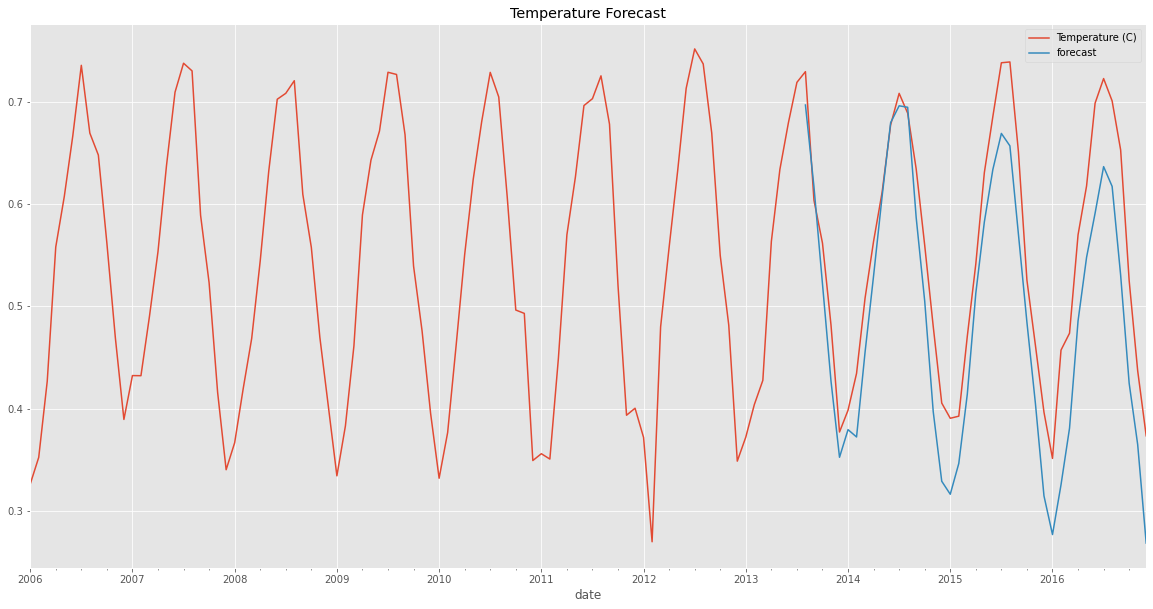

In [124]:
dd_mean['forecast'] = sar2.predict(start = 91, end= 150, dynamic=False)  
dd_mean.plot(y=['Temperature (C)', 'forecast'], title='Temperature Forecast')